## Title: Comparison and Exploratory data analysis of SAM2.1 and SAM1.0 generated feature extarction data for Faba beans
##### Author: Harpreet Kaur Bargota
##### Email: harpreet.bargota@agr.gc.ca
##### Date: March 17, 2025

In [9]:
#import the libraries required for analysis
import pandas as pd
import seaborn as sns
import cv2
import os
import matplotlib.pyplot as plt
from scipy.stats import (pearsonr, ttest_rel, f_oneway, spearmanr, shapiro, levene, wilcoxon, kruskal, skew, kurtosis )
import warnings
warnings.filterwarnings(action='ignore')

#### Read the .csv files of feature extraction for SAM and SAM2.1

In [10]:
#read the .csv files
SegAny2_1=pd.read_csv(r"ouput_FE_SAM2.1/FE_Color.csv")
SegAny1=pd.read_csv(r"output_FE_SAM1.0/FE_Color.csv")
print ("SAM1....")
SegAny1.info()
print ("SAM2.1 ....")
SegAny2_1.info()

SAM1....
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4237 entries, 0 to 4236
Data columns (total 32 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Seed No. per image          4237 non-null   int64  
 1   Class                       4237 non-null   object 
 2   Area_mm2_SAM                4237 non-null   float64
 3   Length_mm_SAM               4237 non-null   float64
 4   Width_mm_SAM                4237 non-null   float64
 5   perimeter_mm_SAM            4237 non-null   float64
 6   Shape                       4237 non-null   object 
 7   centroid-0                  4237 non-null   float64
 8   centroid-1                  4237 non-null   float64
 9   bbox-0                      4237 non-null   int64  
 10  bbox-1                      4237 non-null   int64  
 11  bbox-2                      4237 non-null   int64  
 12  bbox-3                      4237 non-null   int64  
 13  Area_pix_SAM            

#### Check for the index of dfs

In [11]:
print (SegAny1.index)
print (SegAny2_1.index)

RangeIndex(start=0, stop=4237, step=1)
RangeIndex(start=0, stop=4234, step=1)


#### Create a new column with the image code from the Class

In [12]:
SegAny1['ID']=SegAny1['Class'].str.split('_').str[-1]
SegAny1.head(4)

Seed No. per image                   Class  Area_mm2_SAM  Length_mm_SAM  \
0                   0  Faba-Seed-CC_Vf447-1-1     96.143403      11.373806   
1                   1  Faba-Seed-CC_Vf447-1-1     91.316655      10.943228   
2                   2  Faba-Seed-CC_Vf447-1-1     90.058709      10.937975   
3                   3  Faba-Seed-CC_Vf447-1-1     94.335107      11.709844   

   Width_mm_SAM  perimeter_mm_SAM                             Shape  \
0     10.661096         34.710202  Elongated,Oval,Elongated,Ellipse   
1     10.508451         33.758248  Elongated,Oval,Elongated,Ellipse   
2     10.334339         33.489351  Elongated,Oval,Elongated,Ellipse   
3     10.139983         34.554833  Elongated,Oval,Elongated,Ellipse   

    centroid-0   centroid-1  bbox-0  ...  Roundness  Compactness  \
0  2335.192557  2078.798095    2170  ...   0.864883     0.876921   
1  2384.978459  1416.225171    2263  ...   0.868445     0.888251   
2  2660.472312  2647.733426    2538  ...   0.870291     0.882536   
3  2897.660549   848.099538    2773  ...   0.856264     0.843707   

   Circularity_SAM  Shapefactor1  Shapefactor2  Shapefactor3  Shapefactor4  \
0         1.156226      0.005153      0.003985      0.769380      0.994850   
1         1.151484      0.005220      0.004135      0.789391      0.996349   
2         1.149042      0.005290      0.004124      0.779264      0.999659   
3         1.167864      0.005406      0.003863      0.712203      0.996852   

   RGB value of Seed  color_seeds         ID  
0    (163, 158, 120)          tan  Vf447-1-1  
1    (165, 165, 129)          tan  Vf447-1-1  
2    (165, 166, 126)          tan  Vf447-1-1  
3    (160, 158, 120)          tan  Vf447-1-1  

[4 rows x 33 columns]

In [13]:
SegAny2_1['ID']=SegAny2_1['Class'].str.split('_').str[-1]
SegAny2_1.head(5)

Seed No. per image                   Class  Area_mm2_SAM  Length_mm_SAM  \
0                   0  Faba-Seed-CC_Vf447-1-1     95.998881      11.248159   
1                   1  Faba-Seed-CC_Vf447-1-1     90.066237      10.808319   
2                   2  Faba-Seed-CC_Vf447-1-1     89.842653      10.875486   
3                   3  Faba-Seed-CC_Vf447-1-1     94.945278      11.658823   
4                   4  Faba-Seed-CC_Vf447-1-1    103.416984      11.352529   

   Width_mm_SAM  perimeter_mm_SAM                             Shape  \
0     10.770226         34.592780  Elongated,Oval,Elongated,Ellipse   
1     10.496649         33.274504  Elongated,Oval,Elongated,Ellipse   
2     10.374126         33.378610  Elongated,Oval,Elongated,Ellipse   
3     10.245933         34.498360  Elongated,Oval,Elongated,Ellipse   
4     11.508256         35.841529  Elongated,Oval,Elongated,Ellipse   

    centroid-0   centroid-1  bbox-0  ...  Roundness  Compactness  \
0  2335.508590  2079.002664    2171  ...   0.865692     0.882754   
1  2385.548399  1416.398551    2266  ...   0.877823     0.889838   
2  2659.982511  2647.634326    2537  ...   0.870190     0.883244   
3  2897.419571   849.268859    2771  ...   0.860884     0.846974   
4  3153.599591  1793.010706    3026  ...   0.868734     0.907803   

   Circularity_SAM  Shapefactor1  Shapefactor2  Shapefactor3  Shapefactor4  \
0         1.155145      0.005105      0.004002      0.779651      0.994664   
1         1.139182      0.005229      0.004157      0.792214      0.996483   
2         1.149174      0.005274      0.004119      0.780516      0.999537   
3         1.161597      0.005350      0.003849      0.717729      0.997663   
4         1.151100      0.004783      0.003969      0.824524      0.993588   

   RGB value of Seed  color_seeds         ID  
0    (163, 158, 120)          tan  Vf447-1-1  
1    (165, 165, 129)          tan  Vf447-1-1  
2    (165, 166, 126)          tan  Vf447-1-1  
3    (160, 158, 120)          tan  Vf447-1-1  
4    (168, 169, 135)          tan  Vf447-1-1  

[5 rows x 33 columns]

### Drop the main index and reset the index to "ID" for further analysis

In [14]:
SegAny1.reset_index(drop=True)
SegAny1=SegAny1.set_index('ID')
SegAny1.head(2)

Seed No. per image                   Class  Area_mm2_SAM  \
ID                                                                    
Vf447-1-1                   0  Faba-Seed-CC_Vf447-1-1     96.143403   
Vf447-1-1                   1  Faba-Seed-CC_Vf447-1-1     91.316655   

           Length_mm_SAM  Width_mm_SAM  perimeter_mm_SAM  \
ID                                                         
Vf447-1-1      11.373806     10.661096         34.710202   
Vf447-1-1      10.943228     10.508451         33.758248   

                                      Shape   centroid-0   centroid-1  bbox-0  \
ID                                                                              
Vf447-1-1  Elongated,Oval,Elongated,Ellipse  2335.192557  2078.798095    2170   
Vf447-1-1  Elongated,Oval,Elongated,Ellipse  2384.978459  1416.225171    2263   

           ...  Aspect_Ratio  Roundness  Compactness  Circularity_SAM  \
ID         ...                                                          
Vf447-1-1  ...      1.293054   0.864883     0.876921         1.156226   
Vf447-1-1  ...      1.262175   0.868445     0.888251         1.151484   

           Shapefactor1  Shapefactor2  Shapefactor3  Shapefactor4  \
ID                                                                  
Vf447-1-1      0.005153      0.003985      0.769380      0.994850   
Vf447-1-1      0.005220      0.004135      0.789391      0.996349   

           RGB value of Seed  color_seeds  
ID                                         
Vf447-1-1    (163, 158, 120)          tan  
Vf447-1-1    (165, 165, 129)          tan  

[2 rows x 32 columns]

In [15]:
SegAny2_1.reset_index(drop=True)
SegAny2_1=SegAny2_1.set_index('ID')
SegAny2_1.head(2)

Seed No. per image                   Class  Area_mm2_SAM  \
ID                                                                    
Vf447-1-1                   0  Faba-Seed-CC_Vf447-1-1     95.998881   
Vf447-1-1                   1  Faba-Seed-CC_Vf447-1-1     90.066237   

           Length_mm_SAM  Width_mm_SAM  perimeter_mm_SAM  \
ID                                                         
Vf447-1-1      11.248159     10.770226         34.592780   
Vf447-1-1      10.808319     10.496649         33.274504   

                                      Shape   centroid-0   centroid-1  bbox-0  \
ID                                                                              
Vf447-1-1  Elongated,Oval,Elongated,Ellipse  2335.508590  2079.002664    2171   
Vf447-1-1  Elongated,Oval,Elongated,Ellipse  2385.548399  1416.398551    2266   

           ...  Aspect_Ratio  Roundness  Compactness  Circularity_SAM  \
ID         ...                                                          
Vf447-1-1  ...      1.275782   0.865692     0.882754         1.155145   
Vf447-1-1  ...      1.257845   0.877823     0.889838         1.139182   

           Shapefactor1  Shapefactor2  Shapefactor3  Shapefactor4  \
ID                                                                  
Vf447-1-1      0.005105      0.004002      0.779651      0.994664   
Vf447-1-1      0.005229      0.004157      0.792214      0.996483   

           RGB value of Seed  color_seeds  
ID                                         
Vf447-1-1    (163, 158, 120)          tan  
Vf447-1-1    (165, 165, 129)          tan  

[2 rows x 32 columns]

## Exploratory Data Analysis for SAM1 and SAM2 datasets

In [16]:
SAM1_FE=SegAny1.copy()
SAM2_FE=SegAny2_1.copy()
print (SAM1_FE.info())
print (SAM2_FE.info())

<class 'pandas.core.frame.DataFrame'>
Index: 4237 entries, Vf447-1-1 to Vf299-3-1
Data columns (total 32 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Seed No. per image          4237 non-null   int64  
 1   Class                       4237 non-null   object 
 2   Area_mm2_SAM                4237 non-null   float64
 3   Length_mm_SAM               4237 non-null   float64
 4   Width_mm_SAM                4237 non-null   float64
 5   perimeter_mm_SAM            4237 non-null   float64
 6   Shape                       4237 non-null   object 
 7   centroid-0                  4237 non-null   float64
 8   centroid-1                  4237 non-null   float64
 9   bbox-0                      4237 non-null   int64  
 10  bbox-1                      4237 non-null   int64  
 11  bbox-2                      4237 non-null   int64  
 12  bbox-3                      4237 non-null   int64  
 13  Area_pix_SAM             

### Check Structure and Overview:

In [17]:
print (SAM1_FE.info())
print (SAM2_FE.info())

<class 'pandas.core.frame.DataFrame'>
Index: 4237 entries, Vf447-1-1 to Vf299-3-1
Data columns (total 32 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Seed No. per image          4237 non-null   int64  
 1   Class                       4237 non-null   object 
 2   Area_mm2_SAM                4237 non-null   float64
 3   Length_mm_SAM               4237 non-null   float64
 4   Width_mm_SAM                4237 non-null   float64
 5   perimeter_mm_SAM            4237 non-null   float64
 6   Shape                       4237 non-null   object 
 7   centroid-0                  4237 non-null   float64
 8   centroid-1                  4237 non-null   float64
 9   bbox-0                      4237 non-null   int64  
 10  bbox-1                      4237 non-null   int64  
 11  bbox-2                      4237 non-null   int64  
 12  bbox-3                      4237 non-null   int64  
 13  Area_pix_SAM             

In [18]:
print (SAM1_FE.head(2))

for _ in range(4):
    print("------------------------------------------------")

print (SAM2_FE.head(2))

           Seed No. per image                   Class  Area_mm2_SAM  \
ID                                                                    
Vf447-1-1                   0  Faba-Seed-CC_Vf447-1-1     96.143403   
Vf447-1-1                   1  Faba-Seed-CC_Vf447-1-1     91.316655   

           Length_mm_SAM  Width_mm_SAM  perimeter_mm_SAM  \
ID                                                         
Vf447-1-1      11.373806     10.661096         34.710202   
Vf447-1-1      10.943228     10.508451         33.758248   

                                      Shape   centroid-0   centroid-1  bbox-0  \
ID                                                                              
Vf447-1-1  Elongated,Oval,Elongated,Ellipse  2335.192557  2078.798095    2170   
Vf447-1-1  Elongated,Oval,Elongated,Ellipse  2384.978459  1416.225171    2263   

           ...  Aspect_Ratio  Roundness  Compactness  Circularity_SAM  \
ID         ...                                                          
Vf4

In [19]:
print (SAM1_FE.tail(2))

for _ in range(4):
    print("------------------------------------------------")

print (SAM2_FE.tail(2))

           Seed No. per image                   Class  Area_mm2_SAM  \
ID                                                                    
Vf299-3-1                   8  Faba-Seed-CC_Vf299-3-1    140.323559   
Vf299-3-1                   9  Faba-Seed-CC_Vf299-3-1    194.199898   

           Length_mm_SAM  Width_mm_SAM  perimeter_mm_SAM  \
ID                                                         
Vf299-3-1      14.778843     12.116793         42.580666   
Vf299-3-1      18.398488     13.526566         50.911650   

                                      Shape   centroid-0   centroid-1  bbox-0  \
ID                                                                              
Vf299-3-1  Elongated,Oval,Elongated,Ellipse  4243.489283  2019.265066    4098   
Vf299-3-1  Elongated,Oval,Elongated,Ellipse  4393.815644  1173.614342    4255   

           ...  Aspect_Ratio  Roundness  Compactness  Circularity_SAM  \
ID         ...                                                          
Vf2

#### Shape and Column Names:

In [20]:
print ("Shape of df-SAM1: ", SAM1_FE.shape)
print ("Shape of df-SAM2: ", SAM2_FE.shape)
print ("--------------------------------------------------------------------------------")
print ("--------------------------------------------------------------------------------")
print ("columns of df-SAM1: ", SAM1_FE.columns)
print ("--------------------------------------------------------------------------------")
print ("columns of df-SAM1: ", SAM1_FE.columns)

Shape of df-SAM1:  (4237, 32)
Shape of df-SAM2:  (4234, 32)
--------------------------------------------------------------------------------
--------------------------------------------------------------------------------
columns of df-SAM1:  Index(['Seed No. per image', 'Class', 'Area_mm2_SAM', 'Length_mm_SAM',
       'Width_mm_SAM', 'perimeter_mm_SAM', 'Shape', 'centroid-0', 'centroid-1',
       'bbox-0', 'bbox-1', 'bbox-2', 'bbox-3', 'Area_pix_SAM', 'Eccentricity',
       'equivalent_diameter_area', 'perimeter', 'solidity', 'area_convex',
       'extent', 'Axis Major Length(pix)_SAM', 'Axis Minor Length(pix)_SAM',
       'Aspect_Ratio', 'Roundness', 'Compactness', 'Circularity_SAM',
       'Shapefactor1', 'Shapefactor2', 'Shapefactor3', 'Shapefactor4',
       'RGB value of Seed', 'color_seeds'],
      dtype='object')
--------------------------------------------------------------------------------
columns of df-SAM1:  Index(['Seed No. per image', 'Class', 'Area_mm2_SAM', 'Length_mm_S

### Common columns between the dfs

In [21]:
set(SAM1_FE.columns).intersection(SAM2_FE.columns)

{'Area_mm2_SAM',
 'Area_pix_SAM',
 'Aspect_Ratio',
 'Axis Major Length(pix)_SAM',
 'Axis Minor Length(pix)_SAM',
 'Circularity_SAM',
 'Class',
 'Compactness',
 'Eccentricity',
 'Length_mm_SAM',
 'RGB value of Seed',
 'Roundness',
 'Seed No. per image',
 'Shape',
 'Shapefactor1',
 'Shapefactor2',
 'Shapefactor3',
 'Shapefactor4',
 'Width_mm_SAM',
 'area_convex',
 'bbox-0',
 'bbox-1',
 'bbox-2',
 'bbox-3',
 'centroid-0',
 'centroid-1',
 'color_seeds',
 'equivalent_diameter_area',
 'extent',
 'perimeter',
 'perimeter_mm_SAM',
 'solidity'}

### Missing values

In [22]:
print (SAM1_FE.isnull().sum())
print ("-------------------------------------------")
print (SAM2_FE.isnull().sum())


Seed No. per image            0
Class                         0
Area_mm2_SAM                  0
Length_mm_SAM                 0
Width_mm_SAM                  0
perimeter_mm_SAM              0
Shape                         0
centroid-0                    0
centroid-1                    0
bbox-0                        0
bbox-1                        0
bbox-2                        0
bbox-3                        0
Area_pix_SAM                  0
Eccentricity                  0
equivalent_diameter_area      0
perimeter                     0
solidity                      0
area_convex                   0
extent                        0
Axis Major Length(pix)_SAM    0
Axis Minor Length(pix)_SAM    0
Aspect_Ratio                  0
Roundness                     0
Compactness                   0
Circularity_SAM               0
Shapefactor1                  0
Shapefactor2                  0
Shapefactor3                  0
Shapefactor4                  0
RGB value of Seed             0
color_se

### Summary Statistics

In [23]:
print (SAM1_FE.describe())
print ("-------------------------------------------------------------------------------------------------------------")
print ("-------------------------------------------------------------------------------------------------------------")
print ("-------------------------------------------------------------------------------------------------------------")
print (SAM2_FE.describe())

       Seed No. per image  Area_mm2_SAM  Length_mm_SAM  Width_mm_SAM  \
count         4237.000000   4237.000000    4237.000000   4237.000000   
mean             3.801511    136.926048      14.369513     11.378173   
std              2.759227     73.088743       3.987267      3.007172   
min              0.000000     22.124607       5.724498      4.922333   
25%              1.000000     80.414609      11.305929      9.078688   
50%              3.000000    122.830861      14.137262     11.119515   
75%              6.000000    174.779872      16.901113     13.293432   
max             10.000000    455.328758      28.192848     23.374099   

       perimeter_mm_SAM   centroid-0   centroid-1       bbox-0       bbox-1  \
count       4237.000000  4237.000000  4237.000000  4237.000000  4237.000000   
mean          40.958918  3519.002509  1841.109259  3365.423177  1681.011093   
std           11.028273   572.845989   616.922464   575.287341   616.179066   
min           16.777457  2149.53810

# Comparison studies for comparing SAM1 and SAM2 data

In [24]:
SAM1=SegAny1.copy()
SAM2_1=SegAny2_1.copy()

In [25]:
SAM1=SAM1.drop(['Seed No. per image','Class','Shape','RGB value of Seed','color_seeds'], axis=1)
SAM2_1=SAM2_1.drop(['Seed No. per image','Class','Shape','RGB value of Seed','color_seeds'], axis=1)

In [26]:
SAM2_1.columns

Index(['Area_mm2_SAM', 'Length_mm_SAM', 'Width_mm_SAM', 'perimeter_mm_SAM',
       'centroid-0', 'centroid-1', 'bbox-0', 'bbox-1', 'bbox-2', 'bbox-3',
       'Area_pix_SAM', 'Eccentricity', 'equivalent_diameter_area', 'perimeter',
       'solidity', 'area_convex', 'extent', 'Axis Major Length(pix)_SAM',
       'Axis Minor Length(pix)_SAM', 'Aspect_Ratio', 'Roundness',
       'Compactness', 'Circularity_SAM', 'Shapefactor1', 'Shapefactor2',
       'Shapefactor3', 'Shapefactor4'],
      dtype='object')

In [27]:
SAM1c= SAM1.groupby(SAM1.index).apply(lambda group: group.sort_values(by=['Area_pix_SAM', 'Axis Major Length(pix)_SAM'], 
                                            ascending=[True, True])).reset_index(level=0, drop=True)
print (SAM1c.head(5))

           Area_mm2_SAM  Length_mm_SAM  Width_mm_SAM  perimeter_mm_SAM  \
ID                                                                       
Vf1-1-2      189.513117      18.017459     13.422721         49.998865   
Vf1-1-2      228.875668      19.845035     14.713325         55.131148   
Vf1-1-2      236.245887      20.818277     14.498978         56.729043   
Vf1-1-2      245.989678      20.758489     15.109866         57.309609   
Vf100-1-2    111.568339      12.245118     11.719451         38.306298   

            centroid-0   centroid-1  bbox-0  bbox-1  bbox-2  bbox-3  ...  \
ID                                                                   ...   
Vf1-1-2    2744.369692  1605.505886    2557    1395    2925    1825  ...   
Vf1-1-2    4141.701907  2022.778266    3908    1835    4386    2214  ...   
Vf1-1-2    3782.025528  1041.703182    3558     816    4011    1263  ...   
Vf1-1-2    3327.530158  2685.065702    3095    2467    3562    2909  ...   
Vf100-1-2  3505.112958  2

In [28]:
SAM2c= SAM2_1.groupby(SAM2_1.index).apply(lambda group: group.sort_values(by=['Area_pix_SAM', 'Axis Major Length(pix)_SAM'], 
                                            ascending=[True, True])).reset_index(level=0, drop=True)
print (SAM2c.head(5))

           Area_mm2_SAM  Length_mm_SAM  Width_mm_SAM  perimeter_mm_SAM  \
ID                                                                       
Vf1-1-2      189.250480      17.921566     13.468640         49.711842   
Vf1-1-2      228.116410      19.648813     14.811859         54.731884   
Vf1-1-2      235.591818      20.682668     14.549931         56.203889   
Vf1-1-2      245.065990      20.639450     15.138108         56.810980   
Vf100-1-2    112.527123      12.264368     11.798352         38.747031   

            centroid-0   centroid-1  bbox-0  bbox-1  bbox-2  bbox-3  ...  \
ID                                                                   ...   
Vf1-1-2    2744.340842  1605.473390    2557    1393    2924    1826  ...   
Vf1-1-2    4141.270438  2023.329137    3908    1834    4385    2216  ...   
Vf1-1-2    3782.155513  1042.804024    3558     818    4012    1266  ...   
Vf1-1-2    3327.048325  2684.779754    3095    2465    3562    2910  ...   
Vf100-1-2  2741.955970  1

In [29]:
print (SAM1c.index.unique())
print (SAM2c.index.unique())
indexes_equal = SAM1c.index.equals(SAM2c.index)
indexes_equal 

Index(['Vf1-1-2', 'Vf100-1-2', 'Vf101-1-3', 'Vf102-1-3', 'Vf103-1-2',
       'Vf104-1-2', 'Vf106-1-2', 'Vf107-1-3', 'Vf108-1-1', 'Vf109-1-1',
       ...
       'Vf90-1-1', 'Vf91-1-1', 'Vf92-1-1', 'Vf93-1-2', 'Vf94-1-2', 'Vf95-1-2',
       'Vf96-1-2', 'Vf97-1-2', 'Vf98-1-2', 'Vf99-4-1'],
      dtype='object', name='ID', length=554)
Index(['Vf1-1-2', 'Vf100-1-2', 'Vf101-1-3', 'Vf102-1-3', 'Vf103-1-2',
       'Vf104-1-2', 'Vf106-1-2', 'Vf107-1-3', 'Vf108-1-1', 'Vf109-1-1',
       ...
       'Vf90-1-1', 'Vf91-1-1', 'Vf92-1-1', 'Vf93-1-2', 'Vf94-1-2', 'Vf95-1-2',
       'Vf96-1-2', 'Vf97-1-2', 'Vf98-1-2', 'Vf99-4-1'],
      dtype='object', name='ID', length=554)


False

In [30]:
# Indices unique to each DataFrame
absent_in_SAM2c = SAM1c.index.difference(SAM2c.index)
absent_in_SAM1c = SAM2c.index.difference(SAM1c.index)
print ("The index missing in SAM1c is: ", absent_in_SAM1c)
print ("The index missing in SAM2c is: ", absent_in_SAM2c)

The index missing in SAM1c is:  Index([], dtype='object', name='ID')
The index missing in SAM2c is:  Index([], dtype='object', name='ID')


In [31]:
indexes_equal = SAM1c.index.equals(SAM2c.index)
indexes_equal

False

#### Index belong to the same ID, but the length of the index can be different as there can be some missing data from undetected seeds.

In [32]:
#Use groupby to count the index for a class
SAM1c_c=SAM1c.groupby(SAM1c.index)['Length_mm_SAM'].count()
#convert it to dataframe
SAM1c_c=pd.DataFrame(SAM1c_c)
print (SAM1c_c)

#Use groupby to count the index for a class
SAM2c_c=SAM2c.groupby(SAM2c.index)['Length_mm_SAM'].count()
#Use groupby to count the index for a class
SAM2c_c=pd.DataFrame(SAM2c_c).rename(columns={'Length_mm_SAM':'Length_mm_SAM2.1'})
print (SAM2c_c)

# join both dfs together
com=pd.concat([SAM1c_c, SAM2c_c], axis=1)
com=com.rename(columns={'Length_mm_SAM':'Seed count(SAM1)', 'Length_mm_SAM2.1':'Seed count(SAM2.1)'})
print (com)

           Length_mm_SAM
ID                      
Vf1-1-2                4
Vf100-1-2             10
Vf101-1-3             10
Vf102-1-3             10
Vf103-1-2             10
...                  ...
Vf95-1-2               6
Vf96-1-2              10
Vf97-1-2               6
Vf98-1-2               3
Vf99-4-1              10

[554 rows x 1 columns]
           Length_mm_SAM2.1
ID                         
Vf1-1-2                   4
Vf100-1-2                10
Vf101-1-3                10
Vf102-1-3                10
Vf103-1-2                10
...                     ...
Vf95-1-2                  6
Vf96-1-2                 10
Vf97-1-2                  6
Vf98-1-2                  3
Vf99-4-1                 10

[554 rows x 1 columns]
           Seed count(SAM1)  Seed count(SAM2.1)
ID                                             
Vf1-1-2                   4                   4
Vf100-1-2                10                  10
Vf101-1-3                10                  10
Vf102-1-3              

In [33]:
#Create a new df containing the remaining missing seed number
com['seeds left']=com['Seed count(SAM1)']-com['Seed count(SAM2.1)']
com

Seed count(SAM1)  Seed count(SAM2.1)  seeds left
ID                                                         
Vf1-1-2                   4                   4           0
Vf100-1-2                10                  10           0
Vf101-1-3                10                  10           0
Vf102-1-3                10                  10           0
Vf103-1-2                10                  10           0
...                     ...                 ...         ...
Vf95-1-2                  6                   6           0
Vf96-1-2                 10                  10           0
Vf97-1-2                  6                   6           0
Vf98-1-2                  3                   3           0
Vf99-4-1                 10                  10           0

[554 rows x 3 columns]

In [34]:
# calculate the images where seed count is unequal in groundtruth and SAM 
(com['seeds left'] != 0).sum()

6

In [35]:
com.index[com['seeds left'] != 0]

Index(['Vf11-1-1', 'Vf139-1-1', 'Vf198-1-2', 'Vf280-1-2', 'Vf456-1-1',
       'Vf615-1-1'],
      dtype='object', name='ID')

In [36]:
# delete the index from dfs
sam1=SAM1c.drop(com.index[com['seeds left'] != 0])
#sam1.info()
sam1.index.unique()


Index(['Vf1-1-2', 'Vf100-1-2', 'Vf101-1-3', 'Vf102-1-3', 'Vf103-1-2',
       'Vf104-1-2', 'Vf106-1-2', 'Vf107-1-3', 'Vf108-1-1', 'Vf109-1-1',
       ...
       'Vf90-1-1', 'Vf91-1-1', 'Vf92-1-1', 'Vf93-1-2', 'Vf94-1-2', 'Vf95-1-2',
       'Vf96-1-2', 'Vf97-1-2', 'Vf98-1-2', 'Vf99-4-1'],
      dtype='object', name='ID', length=548)

In [37]:
# delete the index from dfs
sam2=SAM2c.drop(com.index[com['seeds left'] != 0])
#sam2.info()
sam2.index.unique()

Index(['Vf1-1-2', 'Vf100-1-2', 'Vf101-1-3', 'Vf102-1-3', 'Vf103-1-2',
       'Vf104-1-2', 'Vf106-1-2', 'Vf107-1-3', 'Vf108-1-1', 'Vf109-1-1',
       ...
       'Vf90-1-1', 'Vf91-1-1', 'Vf92-1-1', 'Vf93-1-2', 'Vf94-1-2', 'Vf95-1-2',
       'Vf96-1-2', 'Vf97-1-2', 'Vf98-1-2', 'Vf99-4-1'],
      dtype='object', name='ID', length=548)

In [38]:
sam2_1=sam2.copy()

In [39]:
sam2_1=sam2.rename(columns={'Area_mm2_SAM':'Area_mm2_SAM2.1', 'Length_mm_SAM':'Length_mm_SAM2.1', 'Width_mm_SAM':'Width_mm_SAM2.1', 'perimeter_mm_SAM':'perimeter_mm_SAM2.1',
                                               'centroid-0':'centroid-0_SAM2.1', 'centroid-1':'centroid-1_SAM2.1', 'bbox-0':'bbox-0_SAM2.1', 'bbox-1':'bbox-1_SAM2.1', 'bbox-2':'bbox-2_SAM2.1', 'bbox-3':'bbox-3_SAM2.1',
                                              'Area_pix_SAM':'Area_pix_SAM2.1', 'Eccentricity':'Eccentricity_SAM2.1', 'equivalent_diameter_area':'equivalent_diameter_area_SAM2.1',
                                              'perimeter':'perimeter_SAM2.1', 'solidity':'solidity_SAM2.1', 'area_convex':'area_convex_SAM2.1',
                                              'extent':'extent_SAM2.1', 'Axis Major Length(pix)_SAM':'Axis Major Length(pix)_SAM2.1', 
                                              'Axis Minor Length(pix)_SAM':'Axis Minor Length(pix)_SAM2.1', 'Aspect_Ratio':'Aspect_Ratio_SAM2.1', 
                                              'Roundness':'Roundness_SAM2.1', 'Compactness':'Compactness_SAM2.1', 'Circularity_SAM':'Circularity_SAM2.1',
                                              'Shapefactor1':'Shapefactor1_SAM2.1', 'Shapefactor2':'Shapefactor2_SAM2.1', 'Shapefactor3':'Shapefactor3_SAM2.1',
                                              'Shapefactor4':'Shapefactor4_SAM2.1'})
sam2_1.head(2)

Area_mm2_SAM2.1  Length_mm_SAM2.1  Width_mm_SAM2.1  \
ID                                                            
Vf1-1-2        189.25048         17.921566        13.468640   
Vf1-1-2        228.11641         19.648813        14.811859   

         perimeter_mm_SAM2.1  centroid-0_SAM2.1  centroid-1_SAM2.1  \
ID                                                                   
Vf1-1-2            49.711842        2744.340842        1605.473390   
Vf1-1-2            54.731884        4141.270438        2023.329137   

         bbox-0_SAM2.1  bbox-1_SAM2.1  bbox-2_SAM2.1  bbox-3_SAM2.1  ...  \
ID                                                                   ...   
Vf1-1-2           2557           1393           2924           1826  ...   
Vf1-1-2           3908           1834           4385           2216  ...   

         Axis Major Length(pix)_SAM2.1  Axis Minor Length(pix)_SAM2.1  \
ID                                                                      
Vf1-1-2                     452.031288                     327.943268   
Vf1-1-2                     495.597225                     360.648865   

         Aspect_Ratio_SAM2.1  Roundness_SAM2.1  Compactness_SAM2.1  \
ID                                                                   
Vf1-1-2             1.378383          0.860857            0.850838   
Vf1-1-2             1.374182          0.856031            0.852013   

         Circularity_SAM2.1  Shapefactor1_SAM2.1  Shapefactor2_SAM2.1  \
ID                                                                      
Vf1-1-2            1.161633             0.003891             0.002823   
Vf1-1-2            1.168182             0.003539             0.002575   

         Shapefactor3_SAM2.1  Shapefactor4_SAM2.1  
ID                                                 
Vf1-1-2             0.724292             0.998351  
Vf1-1-2             0.726294             0.998060  

[2 rows x 27 columns]

In [40]:
print (sam1.compare(sam2))

          Area_mm2_SAM             Length_mm_SAM            Width_mm_SAM  \
                  self       other          self      other         self   
ID                                                                         
Vf1-1-2     189.513117  189.250480     18.017459  17.921566    13.422721   
Vf1-1-2     228.875668  228.116410     19.845035  19.648813    14.713325   
Vf1-1-2     236.245887  235.591818     20.818277  20.682668    14.498978   
Vf1-1-2     245.989678  245.065990     20.758489  20.639450    15.109866   
Vf100-1-2   111.568339  112.527123     12.245118  12.264368    11.719451   
...                ...         ...           ...        ...          ...   
Vf99-4-1    156.315960  158.427236     16.389462  16.458181    12.200275   
Vf99-4-1    158.613403  161.837687     16.558134  16.672134    12.220958   
Vf99-4-1    162.740008  164.866833     16.679593  16.687866    12.488277   
Vf99-4-1    176.236053  183.353333     16.677549  17.209153    13.539369   
Vf99-4-1    

In [41]:
df_sam=pd.concat([sam1, sam2_1], axis=1)
df_sam.head()

Area_mm2_SAM  Length_mm_SAM  Width_mm_SAM  perimeter_mm_SAM  \
ID                                                                       
Vf1-1-2      189.513117      18.017459     13.422721         49.998865   
Vf1-1-2      228.875668      19.845035     14.713325         55.131148   
Vf1-1-2      236.245887      20.818277     14.498978         56.729043   
Vf1-1-2      245.989678      20.758489     15.109866         57.309609   
Vf100-1-2    111.568339      12.245118     11.719451         38.306298   

            centroid-0   centroid-1  bbox-0  bbox-1  bbox-2  bbox-3  ...  \
ID                                                                   ...   
Vf1-1-2    2744.369692  1605.505886    2557    1395    2925    1825  ...   
Vf1-1-2    4141.701907  2022.778266    3908    1835    4386    2214  ...   
Vf1-1-2    3782.025528  1041.703182    3558     816    4011    1263  ...   
Vf1-1-2    3327.530158  2685.065702    3095    2467    3562    2909  ...   
Vf100-1-2  3505.112958  2696.233198    3357    2559    3650    2828  ...   

           Axis Major Length(pix)_SAM2.1  Axis Minor Length(pix)_SAM2.1  \
ID                                                                        
Vf1-1-2                       452.031288                     327.943268   
Vf1-1-2                       495.597225                     360.648865   
Vf1-1-2                       521.673896                     354.271260   
Vf1-1-2                       520.583807                     368.592580   
Vf100-1-2                     288.301527                     257.284433   

           Aspect_Ratio_SAM2.1  Roundness_SAM2.1  Compactness_SAM2.1  \
ID                                                                     
Vf1-1-2               1.378383          0.860857            0.850838   
Vf1-1-2               1.374182          0.856031            0.852013   
Vf1-1-2               1.472527          0.838381            0.822579   
Vf1-1-2               1.412356          0.853556            0.840713   
Vf100-1-2             1.120556          0.844315            0.940229   

           Circularity_SAM2.1  Shapefactor1_SAM2.1  Shapefactor2_SAM2.1  \
ID                                                                        
Vf1-1-2              1.161633             0.003891             0.002823   
Vf1-1-2              1.168182             0.003539             0.002575   
Vf1-1-2              1.192776             0.003607             0.002450   
Vf1-1-2              1.171569             0.003460             0.002450   
Vf100-1-2            1.184392             0.004996             0.004458   

           Shapefactor3_SAM2.1  Shapefactor4_SAM2.1  
ID                                                   
Vf1-1-2               0.724292             0.998351  
Vf1-1-2               0.726294             0.998060  
Vf1-1-2               0.676979             0.996870  
Vf1-1-2               0.707156             0.998756  
Vf100-1-2             0.884479             0.991108  

[5 rows x 54 columns]

In [42]:
df_sam.describe()

Area_mm2_SAM  Length_mm_SAM  Width_mm_SAM  perimeter_mm_SAM  \
count   4186.000000    4186.000000   4186.000000       4186.000000   
mean     137.506515      14.403891     11.402478         41.052716   
std       73.205677       3.986241      3.009027         11.029386   
min       22.124607       5.724498      4.922333         16.777457   
25%       81.138572      11.360144      9.127774         32.476110   
50%      123.315269      14.177358     11.135786         40.185457   
75%      175.502764      16.939740     13.330664         48.017214   
max      455.328758      28.192848     23.374099         77.222761   

        centroid-0   centroid-1       bbox-0       bbox-1       bbox-2  \
count  4186.000000  4186.000000  4186.000000  4186.000000  4186.000000   
mean   3518.449112  1840.645804  3364.514333  1680.197086  3673.930721   
std     573.091174   616.758066   575.424138   616.086225   574.156369   
min    2149.538102   327.380070  1953.000000   151.000000  2326.000000   
25%    3051.548478  1340.937741  2903.000000  1185.000000  3206.000000   
50%    3518.107939  1822.868102  3363.000000  1664.500000  3668.000000   
75%    3982.750170  2333.029249  3836.750000  2172.000000  4135.000000   
max    4998.887300  3744.723029  4868.000000  3579.000000  5127.000000   

            bbox-3  ...  Axis Major Length(pix)_SAM2.1  \
count  4186.000000  ...                    4186.000000   
mean   2002.239130  ...                     362.538060   
std     620.921349  ...                      98.263629   
min     478.000000  ...                     148.659235   
25%    1501.000000  ...                     285.781726   
50%    1986.000000  ...                     356.204251   
75%    2487.750000  ...                     428.619516   
max    3910.000000  ...                     702.301268   

       Axis Minor Length(pix)_SAM2.1  Aspect_Ratio_SAM2.1  Roundness_SAM2.1  \
count                    4186.000000          4186.000000       4186.000000   
mean                      263.837355             1.370765          0.854835   
std                        65.611805             0.124750          0.019625   
min                       122.631129             1.025826          0.714730   
25%                       212.734253             1.284685          0.843911   
50%                       257.903479             1.364911          0.857166   
75%                       307.457338             1.448728          0.868352   
max                       545.682978             2.012760          0.901702   

       Compactness_SAM2.1  Circularity_SAM2.1  Shapefactor1_SAM2.1  \
count         4186.000000         4186.000000          4186.000000   
mean             0.855154            1.170448             0.005156   
std              0.038398            0.027585             0.001314   
min              0.700259            1.109014             0.002346   
25%              0.829518            1.151607             0.004157   
50%              0.854583            1.166635             0.004953   
75%              0.880727            1.184959             0.006004   
max              0.984079            1.399130             0.010402   

       Shapefactor2_SAM2.1  Shapefactor3_SAM2.1  Shapefactor4_SAM2.1  
count          4186.000000          4186.000000          4186.000000  
mean              0.003805             0.733135             0.996828  
std               0.001089             0.065724             0.003043  
min               0.001821             0.490611             0.974222  
25%               0.002982             0.688449             0.995793  
50%               0.003590             0.730683             0.997685  
75%               0.004471             0.776074             0.998836  
max               0.008581             0.968903             1.000398  

[8 rows x 54 columns]

In [43]:
df_sam.index.unique()

Index(['Vf1-1-2', 'Vf100-1-2', 'Vf101-1-3', 'Vf102-1-3', 'Vf103-1-2',
       'Vf104-1-2', 'Vf106-1-2', 'Vf107-1-3', 'Vf108-1-1', 'Vf109-1-1',
       ...
       'Vf90-1-1', 'Vf91-1-1', 'Vf92-1-1', 'Vf93-1-2', 'Vf94-1-2', 'Vf95-1-2',
       'Vf96-1-2', 'Vf97-1-2', 'Vf98-1-2', 'Vf99-4-1'],
      dtype='object', name='ID', length=548)

In [44]:
df_sam.corr()

Area_mm2_SAM  Length_mm_SAM  Width_mm_SAM  \
Area_mm2_SAM                         1.000000       0.970111      0.969569   
Length_mm_SAM                        0.970111       1.000000      0.926591   
Width_mm_SAM                         0.969569       0.926591      1.000000   
perimeter_mm_SAM                     0.987449       0.988805      0.971889   
centroid-0                           0.006862       0.032939     -0.008154   
centroid-1                           0.078625       0.072369      0.078341   
bbox-0                              -0.059434      -0.032477     -0.074726   
bbox-1                               0.012628       0.005892      0.013179   
bbox-2                               0.073523       0.098547      0.058770   
bbox-3                               0.143882       0.138114      0.142853   
Area_pix_SAM                         0.975560       0.943100      0.958911   
Eccentricity                         0.260323       0.422456      0.124175   
equivalent_diameter_area             0.963290       0.953930      0.966055   
perimeter                            0.963743       0.960346      0.959643   
solidity                             0.162255       0.183948      0.209812   
area_convex                          0.975640       0.943115      0.958785   
extent                              -0.040422      -0.077806      0.002470   
Axis Major Length(pix)_SAM           0.952612       0.970973      0.927437   
Axis Minor Length(pix)_SAM           0.946518       0.907214      0.979023   
Aspect_Ratio                         0.250703       0.417941      0.104210   
Roundness                           -0.285293      -0.421332     -0.154912   
Compactness                         -0.255236      -0.421805     -0.110145   
Circularity_SAM                      0.278996       0.414517      0.148113   
Shapefactor1                        -0.868850      -0.876297     -0.932463   
Shapefactor2                        -0.857335      -0.917719     -0.874875   
Shapefactor3                        -0.256831      -0.423029     -0.112753   
Shapefactor4                         0.081988       0.110413      0.091140   
Area_mm2_SAM2.1                      0.999774       0.969714      0.969912   
Length_mm_SAM2.1                     0.969892       0.998581      0.927563   
Width_mm_SAM2.1                      0.968119       0.925520      0.998336   
perimeter_mm_SAM2.1                  0.987064       0.988379      0.971747   
centroid-0_SAM2.1                    0.007041       0.032978     -0.007761   
centroid-1_SAM2.1                    0.078662       0.073319      0.077227   
bbox-0_SAM2.1                       -0.059104      -0.032277     -0.074166   
bbox-1_SAM2.1                        0.012639       0.006880      0.011980   
bbox-2_SAM2.1                        0.073513       0.098384      0.058950   
bbox-3_SAM2.1                        0.143971       0.139040      0.141841   
Area_pix_SAM2.1                      0.975607       0.943132      0.958951   
Eccentricity_SAM2.1                  0.269667       0.423853      0.142756   
equivalent_diameter_area_SAM2.1      0.963465       0.953948      0.966131   
perimeter_SAM2.1                     0.963981       0.960204      0.960027   
solidity_SAM2.1                      0.196670       0.221690      0.247106   
area_convex_SAM2.1                   0.975709       0.943177      0.958845   
extent_SAM2.1                       -0.048508      -0.082635     -0.008091   
Axis Major Length(pix)_SAM2.1        0.952797       0.969871      0.928723   
Axis Minor Length(pix)_SAM2.1        0.946453       0.908103      0.977671   
Aspect_Ratio_SAM2.1                  0.261661       0.420921      0.123989   
Roundness_SAM2.1                    -0.296156      -0.424604     -0.173533   
Compactness_SAM2.1                  -0.266582      -0.425072     -0.130699   
Circularity_SAM2.1                   0.289469       0.417061      0.166713   
Shapefactor1_SAM2.1                 -0.870114      -0.8

In [45]:
#Sns pairplots to visualise the relationship between different variables
# sns.pairplot(df_sam)

Text(0.5, 1.0, 'Correlation Heatmap for SAM1 & SAM2')

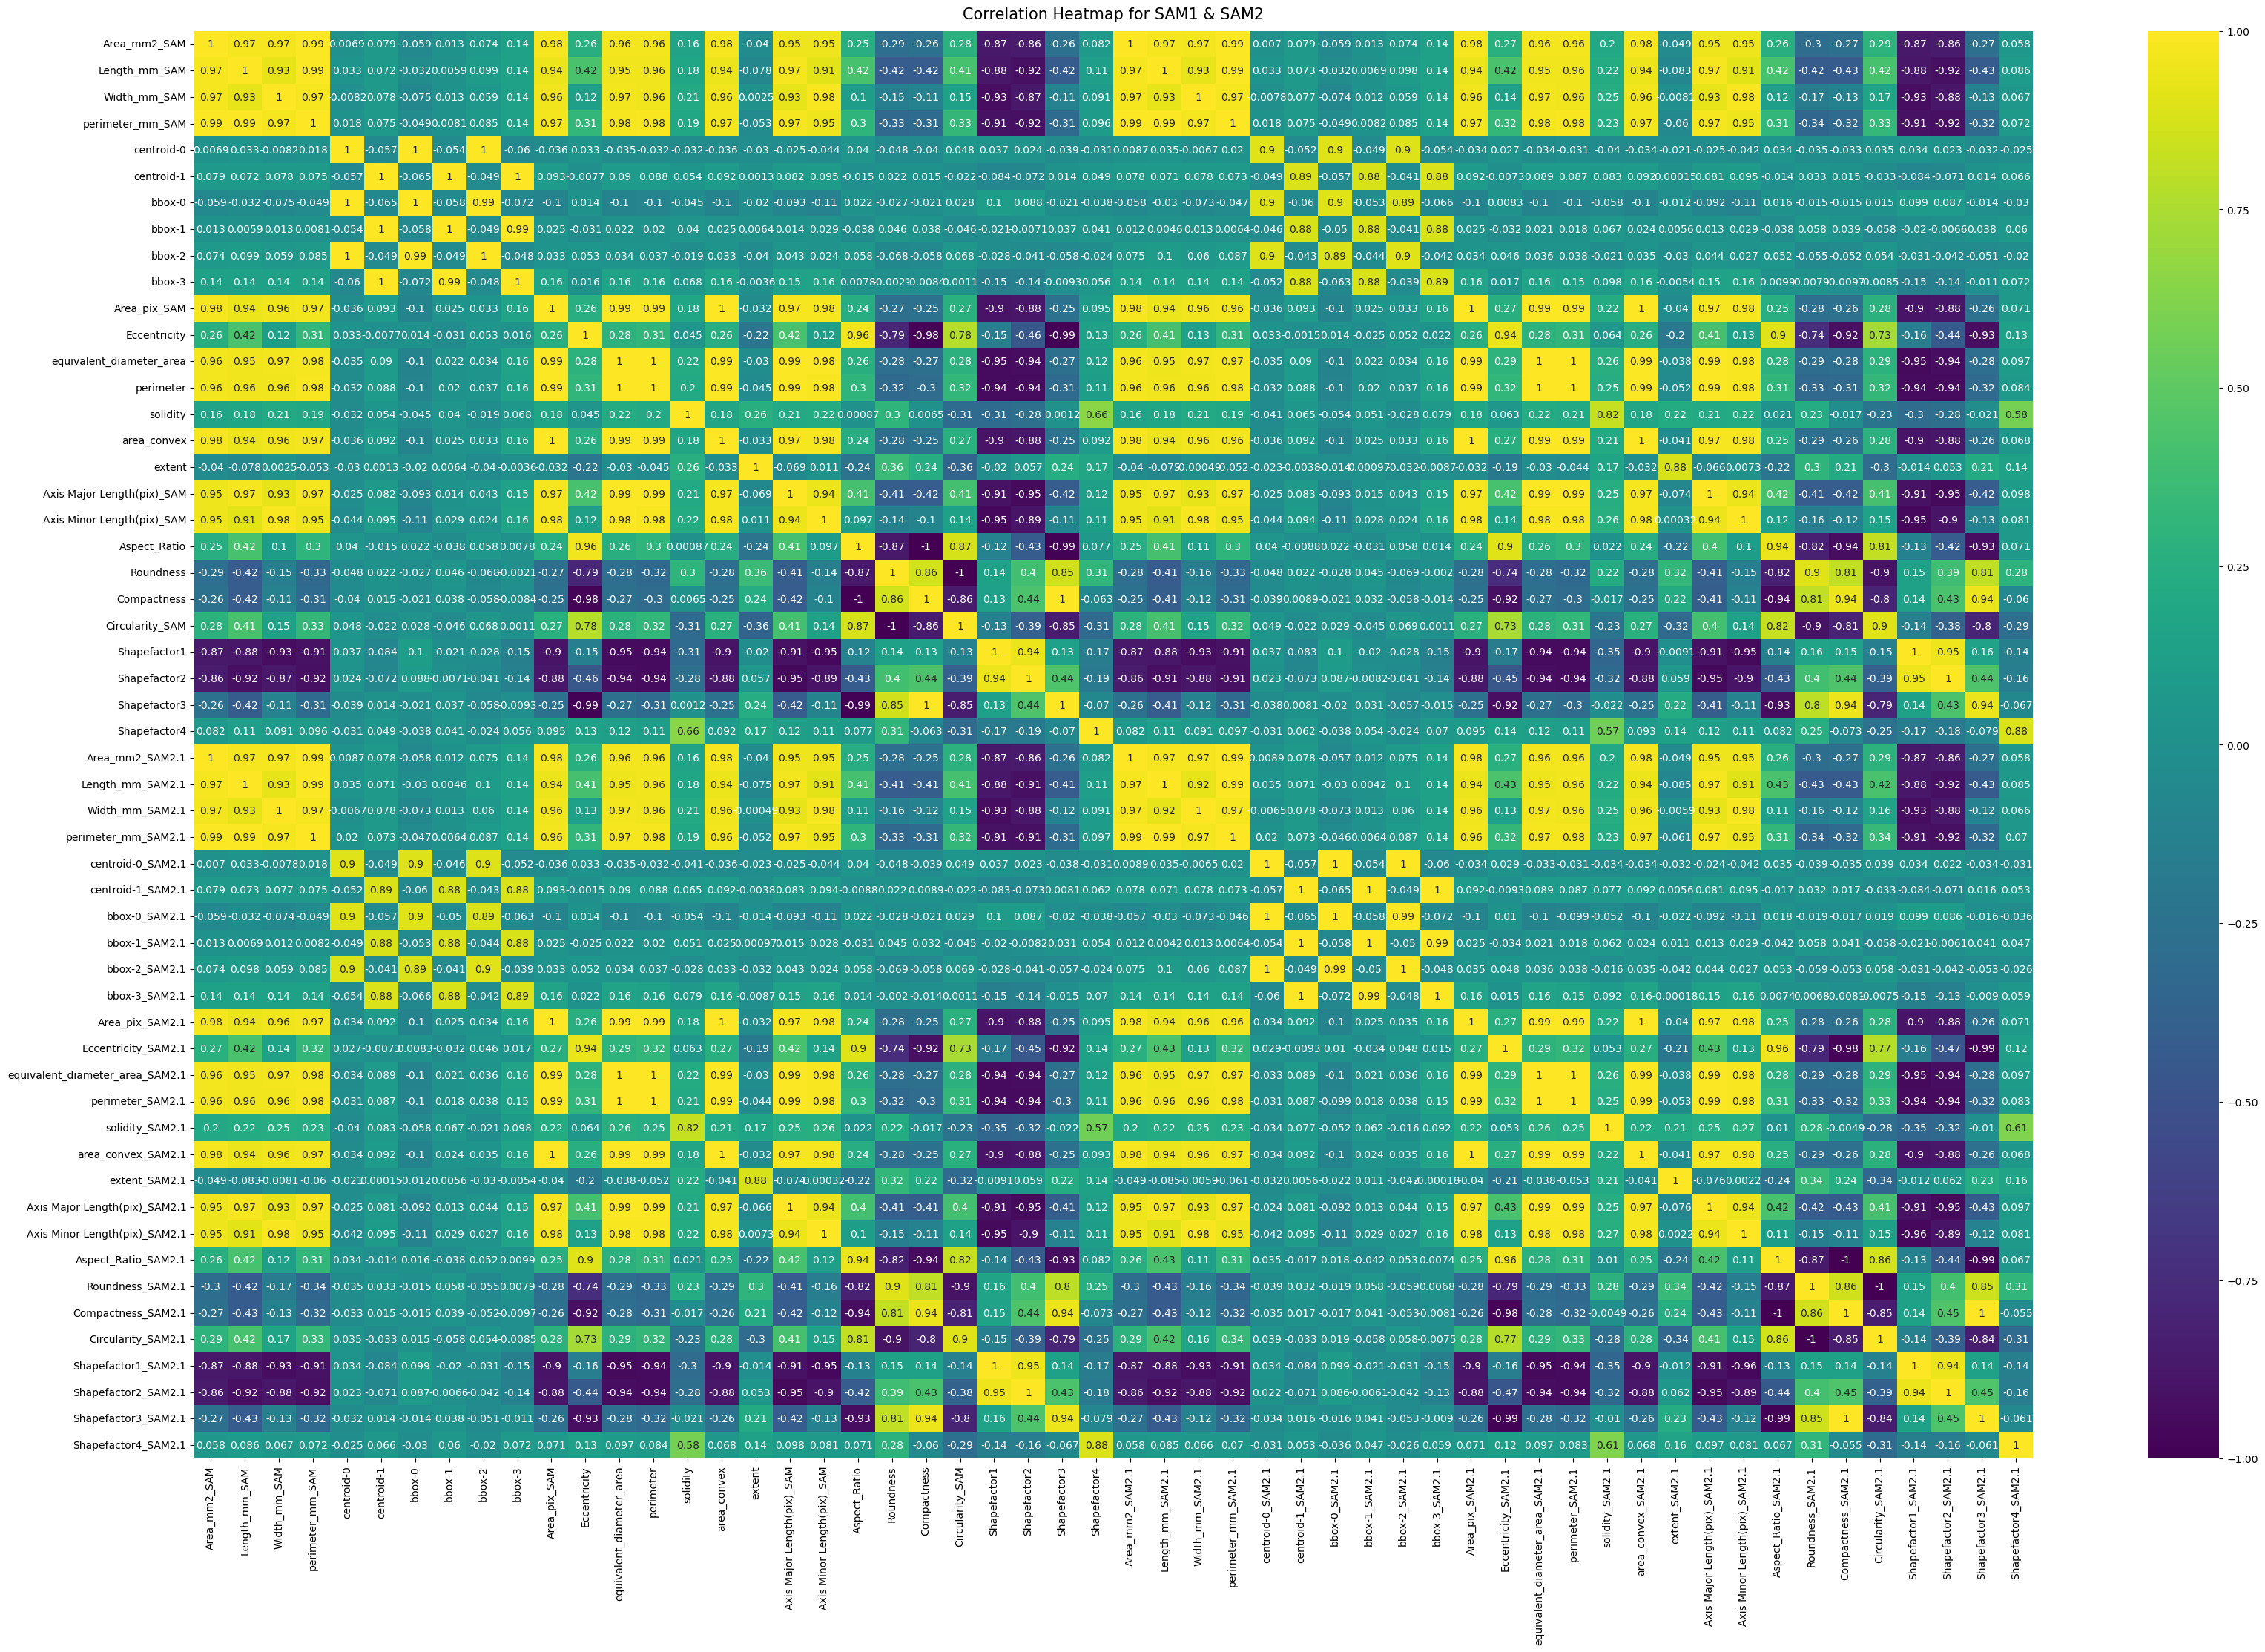

In [46]:
# Set the size of the heatmap.

plt.figure(figsize=(40, 25))

# Set the range of values to be displayed on the colormap from -1 to 1
#set the annotation to True to display the correlation values on the heatmap.
heatmap = sns.heatmap(df_sam.corr(), cmap= 'viridis', vmin=-1, vmax=1, annot=True)

# Give a title to the heatmap. Pad defines the distance of the title from the top of the heatmap.
heatmap.set_title('Correlation Heatmap for SAM1 & SAM2', fontdict={'fontsize':15}, pad=12)

In [47]:
#Function to perform detailed statistical analysis (for selected columns), including descriptive statistics, normality tests, 
#checks for equal variances, comparison of means between pairs of columns, correlation to measure linear relationships, 
#comparison of means of multiple groups, and visualization techniques to each set of columns independently.

def analyze_columns(df, columns):
    print(f"\nAnalyzing columns: {columns}\n")
    
    # Descriptive statistics
    descriptive_stats = df[columns].describe()
    skewness = df[columns].skew()
    kurtosis_values = df[columns].kurtosis()
    
    
    print("Descriptive Statistics:\n", descriptive_stats)
    print("\nSkewness:\n", skewness)
    print("\nKurtosis:\n", kurtosis_values)
    
    # Create a histogram to visualize the distribution of the column 
    plt.figure(figsize=(4, 3))
    sns.histplot(df[columns], kde=True, color='blue', bins=30)
    plt.title(f"Distribution of {columns}")
    plt.xlabel("Values")
    plt.ylabel("Frequency")
    plt.show()
    
    # Normality test (Shapiro-Wilk)
    for col in columns:
        shapiro_test = shapiro(df[col])
        print(f"\nShapiro-Wilk Test for '{col}': {shapiro_test}")
    
    # Variance Homogeneity (Levene's Test)
    levene_test = levene(*[df[col] for col in columns])
    print(f"\nLevene's Test for equality of variances: {levene_test}")
    
    # Paired t-tests and Wilcoxon Signed-Rank Test for all column pairs
    for i in range(len(columns)):
        for j in range(i+1, len(columns)):
            col1, col2 = columns[i], columns[j]
            
            # Paired t-test
            ttest = ttest_rel(df[col1], df[col2])
            print(f"\nPaired t-test between '{col1}' and '{col2}': {ttest}")
            
            # Wilcoxon Signed-Rank Test
            wilcoxon_test = wilcoxon(df[col1], df[col2])
            print(f"Wilcoxon Signed-Rank Test between '{col1}' and '{col2}': {wilcoxon_test}")
            
            # Pearson and Spearman correlation
            pearson_corr = pearsonr(df[col1], df[col2])
            spearman_corr = spearmanr(df[col1], df[col2])
            print(f"Pearson correlation between '{col1}' and '{col2}': {pearson_corr}")
            print(f"Spearman correlation between '{col1}' and '{col2}': {spearman_corr}")

    # ANOVA
    anova_result = f_oneway(*[df[col] for col in columns])
    print(f"\nANOVA result across {columns}: {anova_result}")
    
    # Kruskal-Wallis Test
    kruskal_test = kruskal(*[df[col] for col in columns])
    print(f"Kruskal-Wallis Test across {columns}: {kruskal_test}")
    
    # Visualization
    #barplot
    # ax = df[columns].plot(kind='bar', title = f"Comparison of {columns} of beans",
    #     figsize=(12,5), legend=True, fontsize=10)
    # ax.set_xlabel("ID", fontsize=5)
    # ax.set_ylabel(f'Units(mm)', fontsize=12)
    # plt.show()
    
    # Pairplot
    plt.figure(figsize=(2, 1))
    sns.pairplot(df[columns])
    plt.suptitle(f'Pairplot of {columns}', y=1.02)
    plt.show()
    
    # Boxplot
    plt.figure(figsize=(5, 4))
    sns.boxplot(data=df[columns])
    plt.title(f'Boxplot of {columns}')
    plt.show()
    
    # Violin plot
    plt.figure(figsize=(5, 4))
    sns.violinplot(data=df[columns])
    plt.title(f'Violin Plot of {columns}')
    plt.show()
    
    # Heatmap of Correlations
    correlation_matrix = df[columns].corr(method='pearson')
    plt.figure(figsize=(4, 3))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
    plt.title(f'Correlation Heatmap of {columns}')
    plt.show()




Analyzing columns: ['Length_mm_SAM', 'Length_mm_SAM2.1']

Descriptive Statistics:
        Length_mm_SAM  Length_mm_SAM2.1
count    4186.000000       4186.000000
mean       14.403891         14.401243
std         3.986241          3.976344
min         5.724498          5.637685
25%        11.360144         11.337238
50%        14.177358         14.169270
75%        16.939740         16.929404
max        28.192848         28.260187

Skewness:
 Length_mm_SAM       0.497474
Length_mm_SAM2.1    0.500226
dtype: float64

Kurtosis:
 Length_mm_SAM      -0.055706
Length_mm_SAM2.1   -0.053052
dtype: float64


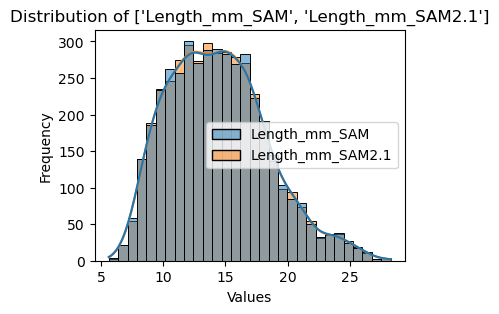


Shapiro-Wilk Test for 'Length_mm_SAM': ShapiroResult(statistic=0.9796175153992583, pvalue=4.48069919865563e-24)

Shapiro-Wilk Test for 'Length_mm_SAM2.1': ShapiroResult(statistic=0.9794341306864364, pvalue=3.533538074326631e-24)

Levene's Test for equality of variances: LeveneResult(statistic=0.028895202839637816, pvalue=0.8650253414638909)

Paired t-test between 'Length_mm_SAM' and 'Length_mm_SAM2.1': TtestResult(statistic=0.8068664427771192, pvalue=0.4197892852184677, df=4185)
Wilcoxon Signed-Rank Test between 'Length_mm_SAM' and 'Length_mm_SAM2.1': WilcoxonResult(statistic=4179343.0, pvalue=0.009660466467273214)
Pearson correlation between 'Length_mm_SAM' and 'Length_mm_SAM2.1': PearsonRResult(statistic=0.9985805992871577, pvalue=0.0)
Spearman correlation between 'Length_mm_SAM' and 'Length_mm_SAM2.1': SignificanceResult(statistic=0.9984849214412035, pvalue=0.0)

ANOVA result across ['Length_mm_SAM', 'Length_mm_SAM2.1']: F_onewayResult(statistic=0.0009260862155138194, pvalue=0.9757

<Figure size 200x100 with 0 Axes>

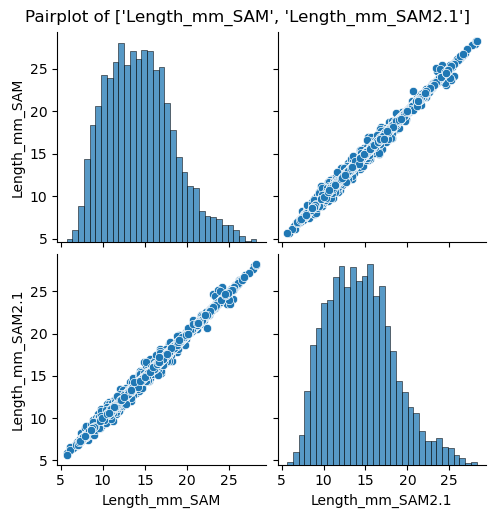

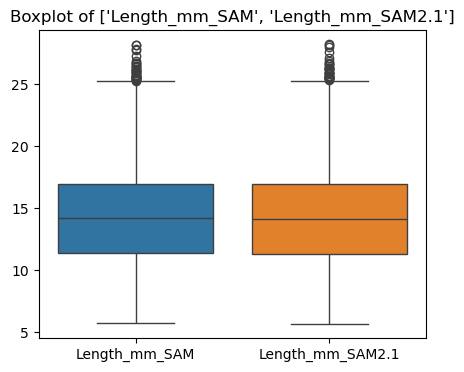

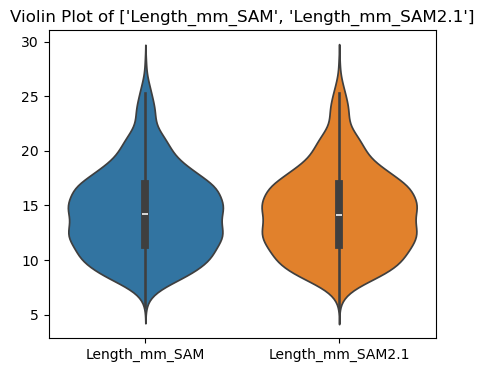

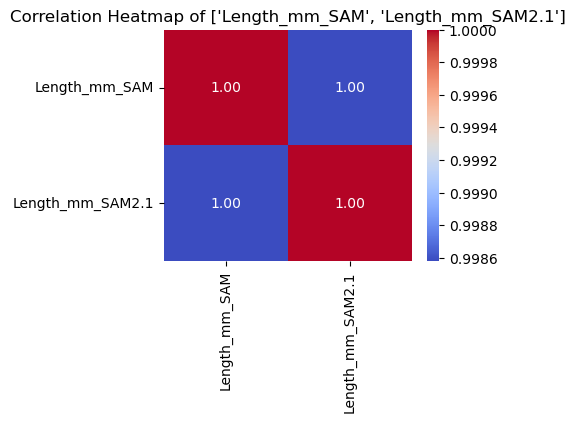

In [48]:
# Perform analysis on both sets of columns
analyze_columns(df_sam, ['Length_mm_SAM','Length_mm_SAM2.1'])

### There is 100 % correlation between the lengths of SAM1.0 and SAM2.1. 


Analyzing columns: ['Width_mm_SAM', 'Width_mm_SAM2.1']

Descriptive Statistics:
        Width_mm_SAM  Width_mm_SAM2.1
count   4186.000000      4186.000000
mean      11.402478        11.418885
std        3.009027         2.986501
min        4.922333         4.948434
25%        9.127774         9.159742
50%       11.135786        11.174595
75%       13.330664        13.339979
max       23.374099        23.357300

Skewness:
 Width_mm_SAM       0.486630
Width_mm_SAM2.1    0.487441
dtype: float64

Kurtosis:
 Width_mm_SAM      -0.155466
Width_mm_SAM2.1   -0.148787
dtype: float64


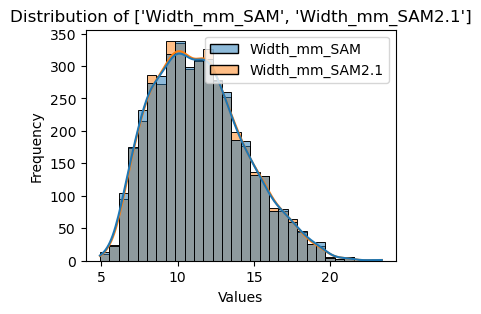


Shapiro-Wilk Test for 'Width_mm_SAM': ShapiroResult(statistic=0.9797358327384216, pvalue=5.2270349541625034e-24)

Shapiro-Wilk Test for 'Width_mm_SAM2.1': ShapiroResult(statistic=0.9797982273058765, pvalue=5.670971014447946e-24)

Levene's Test for equality of variances: LeveneResult(statistic=0.2019203492551731, pvalue=0.6531868751310173)

Paired t-test between 'Width_mm_SAM' and 'Width_mm_SAM2.1': TtestResult(statistic=-6.086100711923904, pvalue=1.2606306849890073e-09, df=4185)
Wilcoxon Signed-Rank Test between 'Width_mm_SAM' and 'Width_mm_SAM2.1': WilcoxonResult(statistic=3415724.0, pvalue=4.683116619288142e-35)
Pearson correlation between 'Width_mm_SAM' and 'Width_mm_SAM2.1': PearsonRResult(statistic=0.9983355610163224, pvalue=0.0)
Spearman correlation between 'Width_mm_SAM' and 'Width_mm_SAM2.1': SignificanceResult(statistic=0.9981706420252766, pvalue=0.0)

ANOVA result across ['Width_mm_SAM', 'Width_mm_SAM2.1']: F_onewayResult(statistic=0.06269584833330309, pvalue=0.8022908327200

<Figure size 200x100 with 0 Axes>

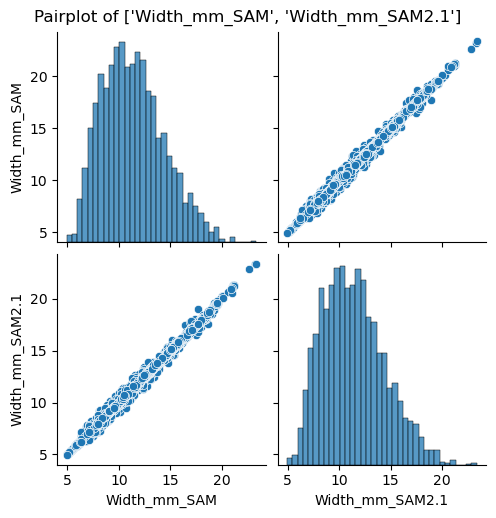

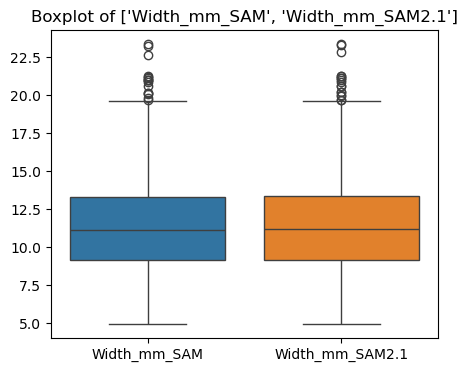

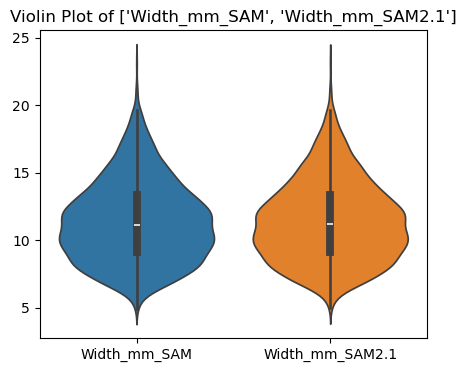

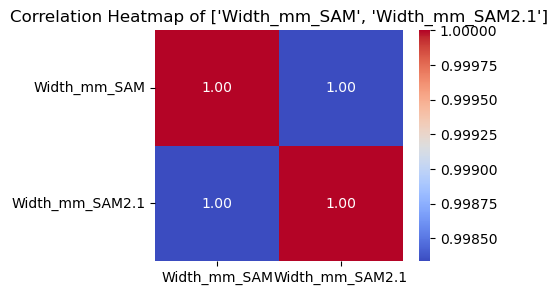

In [49]:
# Perform analysis on both sets of columns
analyze_columns(df_sam, ['Width_mm_SAM','Width_mm_SAM2.1'])


Analyzing columns: ['Area_mm2_SAM', 'Area_mm2_SAM2.1']

Descriptive Statistics:
        Area_mm2_SAM  Area_mm2_SAM2.1
count   4186.000000      4186.000000
mean     137.506515       137.587816
std       73.205677        72.799812
min       22.124607        21.907123
25%       81.138572        81.201094
50%      123.315269       123.251329
75%      175.502764       175.957442
max      455.328758       457.537116

Skewness:
 Area_mm2_SAM       1.062392
Area_mm2_SAM2.1    1.057481
dtype: float64

Kurtosis:
 Area_mm2_SAM       1.082263
Area_mm2_SAM2.1    1.071177
dtype: float64


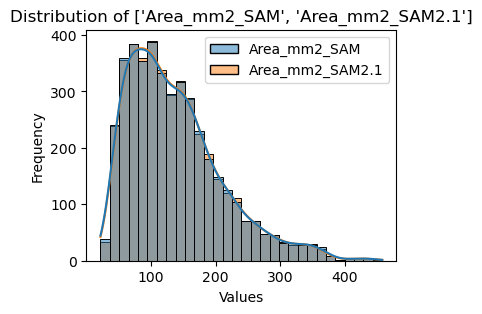


Shapiro-Wilk Test for 'Area_mm2_SAM': ShapiroResult(statistic=0.9263176660868329, pvalue=2.80848841086956e-41)

Shapiro-Wilk Test for 'Area_mm2_SAM2.1': ShapiroResult(statistic=0.9269469786062158, pvalue=3.796456964916091e-41)

Levene's Test for equality of variances: LeveneResult(statistic=0.07085938150716015, pvalue=0.7900961639453227)

Paired t-test between 'Area_mm2_SAM' and 'Area_mm2_SAM2.1': TtestResult(statistic=-3.2759119773710172, pvalue=0.0010617957263358425, df=4185)
Wilcoxon Signed-Rank Test between 'Area_mm2_SAM' and 'Area_mm2_SAM2.1': WilcoxonResult(statistic=3759837.0, pvalue=1.827340314174818e-15)
Pearson correlation between 'Area_mm2_SAM' and 'Area_mm2_SAM2.1': PearsonRResult(statistic=0.9997735633858912, pvalue=0.0)
Spearman correlation between 'Area_mm2_SAM' and 'Area_mm2_SAM2.1': SignificanceResult(statistic=0.9998012834092571, pvalue=0.0)

ANOVA result across ['Area_mm2_SAM', 'Area_mm2_SAM2.1']: F_onewayResult(statistic=0.0025958398495742746, pvalue=0.959367068673

<Figure size 200x100 with 0 Axes>

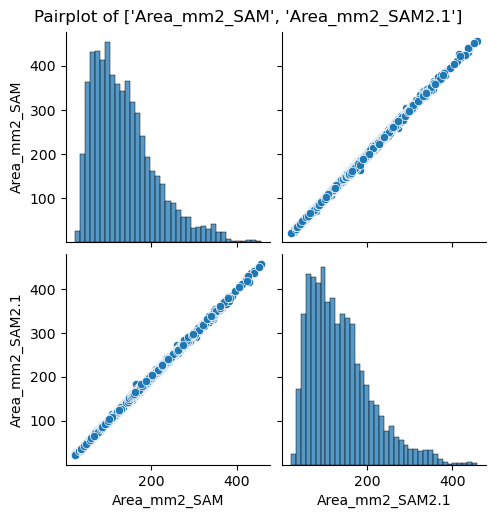

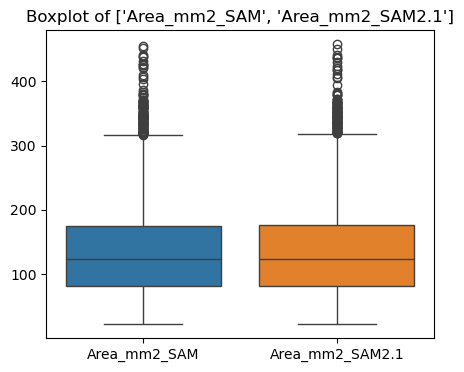

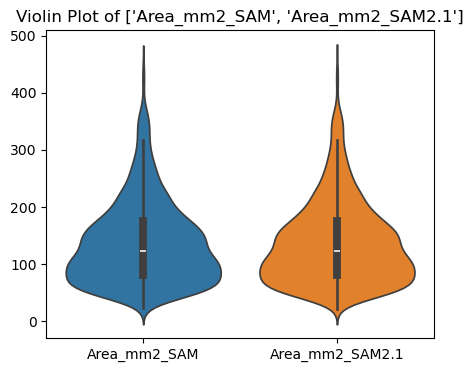

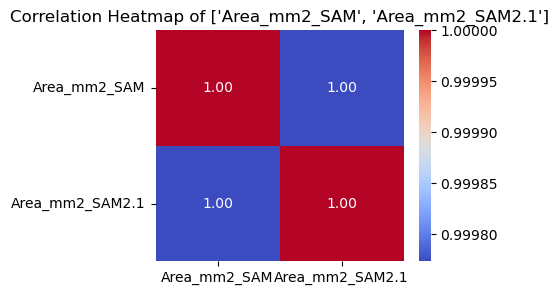

In [50]:
# Perform analysis on both sets of columns
analyze_columns(df_sam, ['Area_mm2_SAM','Area_mm2_SAM2.1'])


Analyzing columns: ['perimeter_mm_SAM', 'perimeter_mm_SAM2.1']

Descriptive Statistics:
        perimeter_mm_SAM  perimeter_mm_SAM2.1
count       4186.000000          4186.000000
mean          41.052716            41.010259
std           11.029386            10.961546
min           16.777457            16.572178
25%           32.476110            32.453620
50%           40.185457            40.129404
75%           48.017214            47.972732
max           77.222761            76.972446

Skewness:
 perimeter_mm_SAM       0.474490
perimeter_mm_SAM2.1    0.473464
dtype: float64

Kurtosis:
 perimeter_mm_SAM      -0.169618
perimeter_mm_SAM2.1   -0.172609
dtype: float64


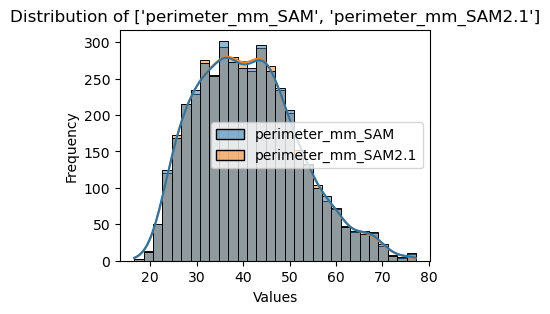


Shapiro-Wilk Test for 'perimeter_mm_SAM': ShapiroResult(statistic=0.9797511479737788, pvalue=5.332582473096256e-24)

Shapiro-Wilk Test for 'perimeter_mm_SAM2.1': ShapiroResult(statistic=0.9797948277701355, pvalue=5.645812752525609e-24)

Levene's Test for equality of variances: LeveneResult(statistic=0.1558698432718939, pvalue=0.6929979344571048)

Paired t-test between 'perimeter_mm_SAM' and 'perimeter_mm_SAM2.1': TtestResult(statistic=8.504691678167708, pvalue=2.5011469298097848e-17, df=4185)
Wilcoxon Signed-Rank Test between 'perimeter_mm_SAM' and 'perimeter_mm_SAM2.1': WilcoxonResult(statistic=3499940.0, pvalue=1.7204797657026312e-29)
Pearson correlation between 'perimeter_mm_SAM' and 'perimeter_mm_SAM2.1': PearsonRResult(statistic=0.9995875868587439, pvalue=0.0)
Spearman correlation between 'perimeter_mm_SAM' and 'perimeter_mm_SAM2.1': SignificanceResult(statistic=0.9996011532726068, pvalue=0.0)

ANOVA result across ['perimeter_mm_SAM', 'perimeter_mm_SAM2.1']: F_onewayResult(statis

<Figure size 200x100 with 0 Axes>

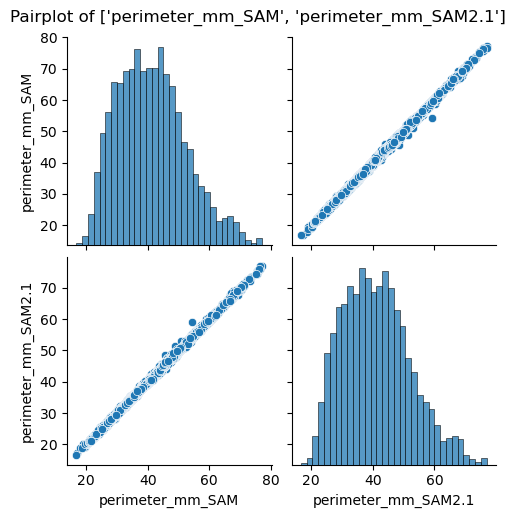

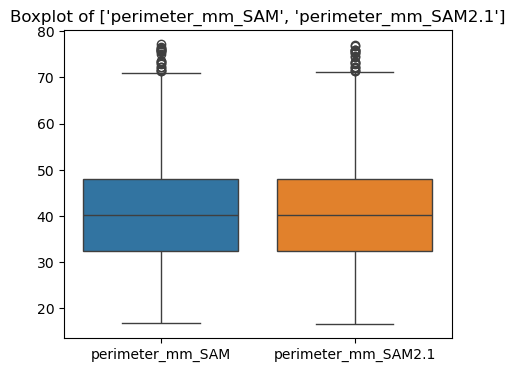

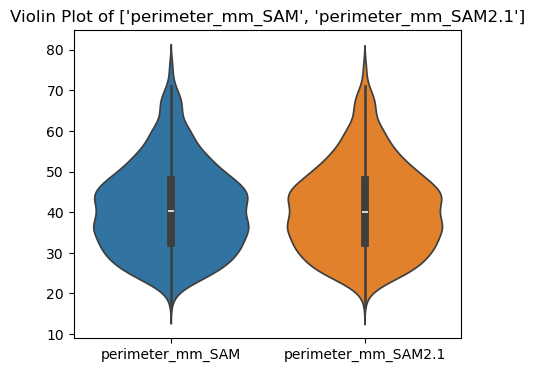

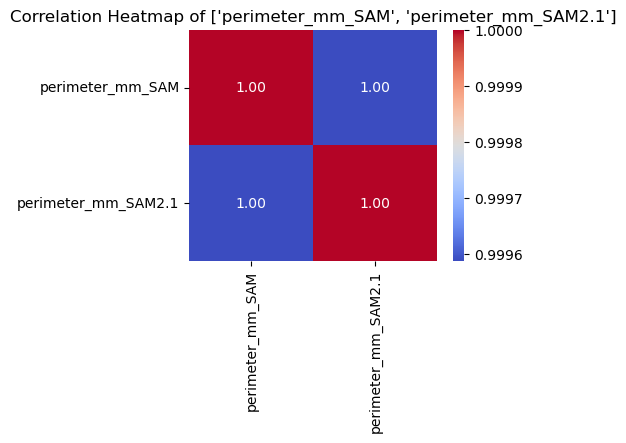

In [51]:
analyze_columns(df_sam, ['perimeter_mm_SAM', 'perimeter_mm_SAM2.1'])


Analyzing columns: ['centroid-0', 'centroid-0_SAM2.1']

Descriptive Statistics:
         centroid-0  centroid-0_SAM2.1
count  4186.000000        4186.000000
mean   3518.449112        3517.971895
std     573.091174         572.829869
min    2149.538102        2150.311627
25%    3051.548478        3050.896471
50%    3518.107939        3517.702149
75%    3982.750170        3981.126811
max    4998.887300        4998.660120

Skewness:
 centroid-0           0.014785
centroid-0_SAM2.1    0.014866
dtype: float64

Kurtosis:
 centroid-0          -0.965293
centroid-0_SAM2.1   -0.965726
dtype: float64


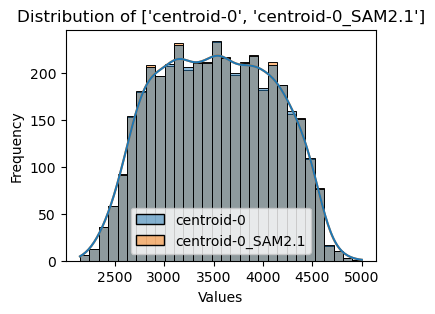


Shapiro-Wilk Test for 'centroid-0': ShapiroResult(statistic=0.9788416146739366, pvalue=1.6580595466035564e-24)

Shapiro-Wilk Test for 'centroid-0_SAM2.1': ShapiroResult(statistic=0.978813140701288, pvalue=1.5994934876891128e-24)

Levene's Test for equality of variances: LeveneResult(statistic=0.0009941052843843309, pvalue=0.9748480696603677)

Paired t-test between 'centroid-0' and 'centroid-0_SAM2.1': TtestResult(statistic=0.12095896425910696, pvalue=0.9037293450988948, df=4185)
Wilcoxon Signed-Rank Test between 'centroid-0' and 'centroid-0_SAM2.1': WilcoxonResult(statistic=1801484.0, pvalue=9.08545796677327e-239)
Pearson correlation between 'centroid-0' and 'centroid-0_SAM2.1': PearsonRResult(statistic=0.9007626494020647, pvalue=0.0)
Spearman correlation between 'centroid-0' and 'centroid-0_SAM2.1': SignificanceResult(statistic=0.8999362712529526, pvalue=0.0)

ANOVA result across ['centroid-0', 'centroid-0_SAM2.1']: F_onewayResult(statistic=0.0014519500964603655, pvalue=0.96960530171

<Figure size 200x100 with 0 Axes>

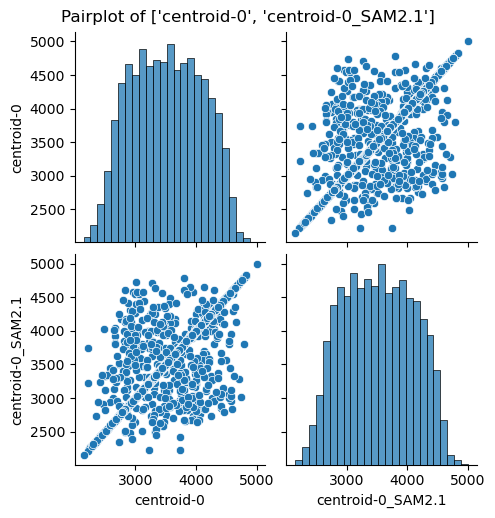

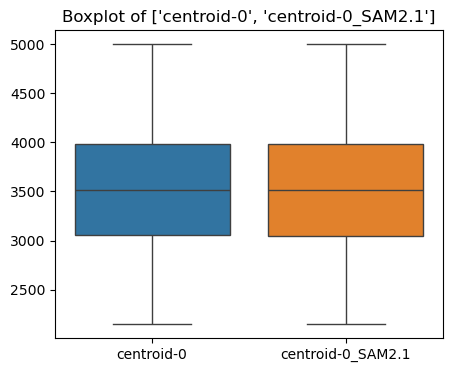

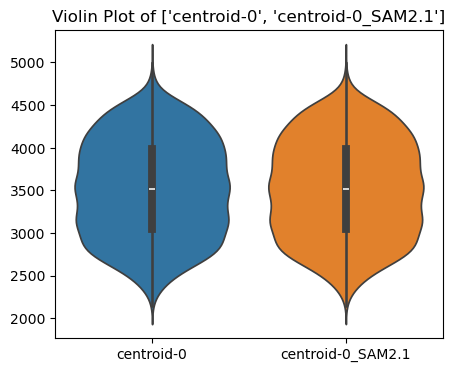

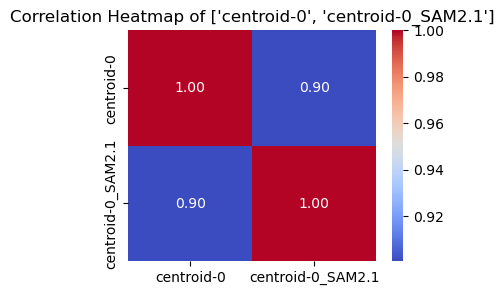

In [52]:
analyze_columns(df_sam, ['centroid-0', 'centroid-0_SAM2.1'])


Analyzing columns: ['centroid-1', 'centroid-1_SAM2.1']

Descriptive Statistics:
         centroid-1  centroid-1_SAM2.1
count  4186.000000        4186.000000
mean   1840.645804        1840.916916
std     616.758066         616.575473
min     327.380070         327.478962
25%    1340.937741        1341.565312
50%    1822.868102        1822.977913
75%    2333.029249        2333.470183
max    3744.723029        3743.919488

Skewness:
 centroid-1           0.094078
centroid-1_SAM2.1    0.094046
dtype: float64

Kurtosis:
 centroid-1          -0.837900
centroid-1_SAM2.1   -0.837818
dtype: float64


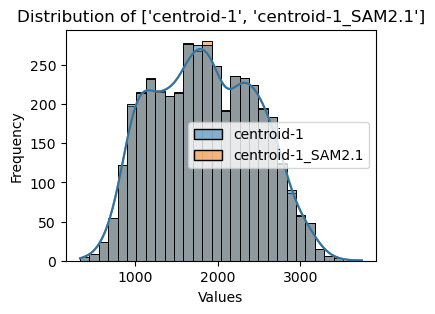


Shapiro-Wilk Test for 'centroid-1': ShapiroResult(statistic=0.9837425817741983, pvalue=1.5041560180517683e-21)

Shapiro-Wilk Test for 'centroid-1_SAM2.1': ShapiroResult(statistic=0.9837464646114187, pvalue=1.5131500013545652e-21)

Levene's Test for equality of variances: LeveneResult(statistic=0.0004528756322800173, pvalue=0.9830221073354313)

Paired t-test between 'centroid-1' and 'centroid-1_SAM2.1': TtestResult(statistic=-0.05947770630081905, pvalue=0.9525744616532617, df=4185)
Wilcoxon Signed-Rank Test between 'centroid-1' and 'centroid-1_SAM2.1': WilcoxonResult(statistic=2454351.0, pvalue=3.9119216415728034e-134)
Pearson correlation between 'centroid-1' and 'centroid-1_SAM2.1': PearsonRResult(statistic=0.885644171466963, pvalue=0.0)
Spearman correlation between 'centroid-1' and 'centroid-1_SAM2.1': SignificanceResult(statistic=0.8831082115003396, pvalue=0.0)

ANOVA result across ['centroid-1', 'centroid-1_SAM2.1']: F_onewayResult(statistic=0.00040454503582261486, pvalue=0.9839534

<Figure size 200x100 with 0 Axes>

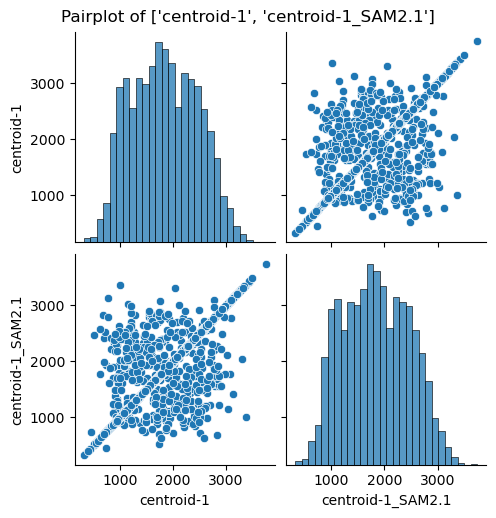

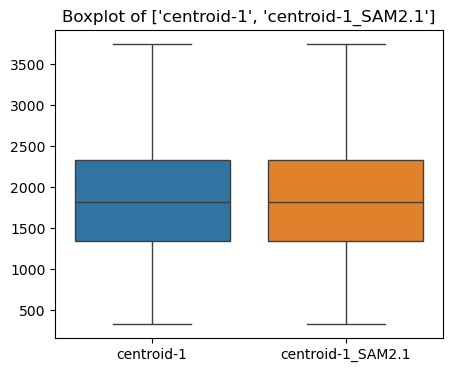

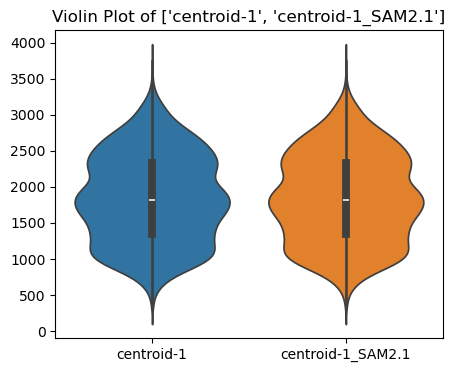

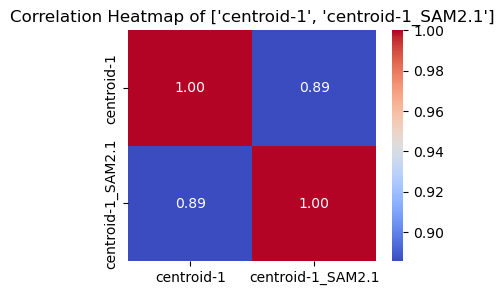

In [53]:
analyze_columns(df_sam, ['centroid-1', 'centroid-1_SAM2.1'])


Analyzing columns: ['bbox-0', 'bbox-0_SAM2.1']

Descriptive Statistics:
             bbox-0  bbox-0_SAM2.1
count  4186.000000    4186.000000
mean   3364.514333    3363.912805
std     575.424138     575.058151
min    1953.000000    1951.000000
25%    2903.000000    2902.000000
50%    3363.000000    3363.500000
75%    3836.750000    3838.000000
max    4868.000000    4870.000000

Skewness:
 bbox-0           0.006638
bbox-0_SAM2.1    0.006447
dtype: float64

Kurtosis:
 bbox-0          -0.943047
bbox-0_SAM2.1   -0.943924
dtype: float64


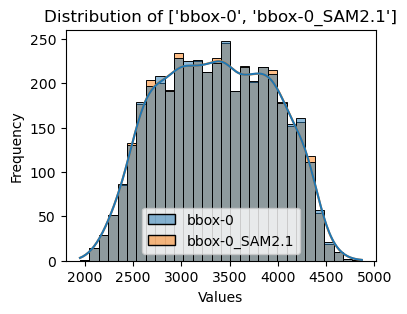


Shapiro-Wilk Test for 'bbox-0': ShapiroResult(statistic=0.9801971625477455, pvalue=9.592993939392992e-24)

Shapiro-Wilk Test for 'bbox-0_SAM2.1': ShapiroResult(statistic=0.9801411667877027, pvalue=8.906447543737226e-24)

Levene's Test for equality of variances: LeveneResult(statistic=0.0018521203144606206, pvalue=0.9656736499504756)

Paired t-test between 'bbox-0' and 'bbox-0_SAM2.1': TtestResult(statistic=0.1526424707948401, pvalue=0.8786875891002623, df=4185)
Wilcoxon Signed-Rank Test between 'bbox-0' and 'bbox-0_SAM2.1': WilcoxonResult(statistic=1768368.5, pvalue=2.297177420633553e-59)
Pearson correlation between 'bbox-0' and 'bbox-0_SAM2.1': PearsonRResult(statistic=0.9017730355972563, pvalue=0.0)
Spearman correlation between 'bbox-0' and 'bbox-0_SAM2.1': SignificanceResult(statistic=0.9004342617341079, pvalue=0.0)

ANOVA result across ['bbox-0', 'bbox-0_SAM2.1']: F_onewayResult(statistic=0.002288665401730199, pvalue=0.9618449006877353)
Kruskal-Wallis Test across ['bbox-0', 'bbox-

<Figure size 200x100 with 0 Axes>

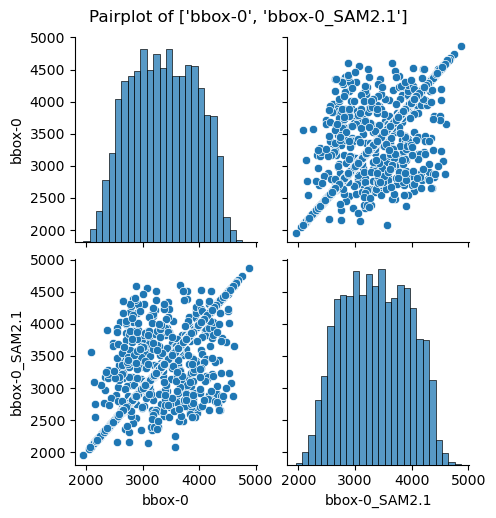

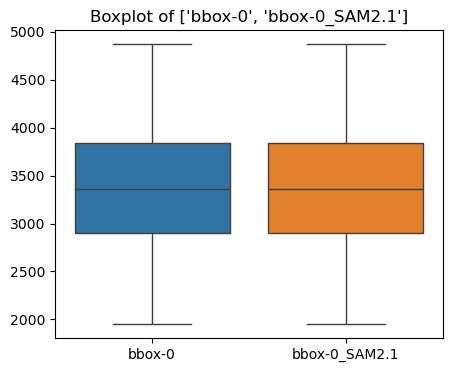

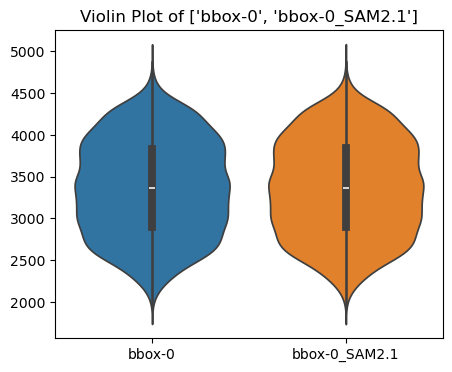

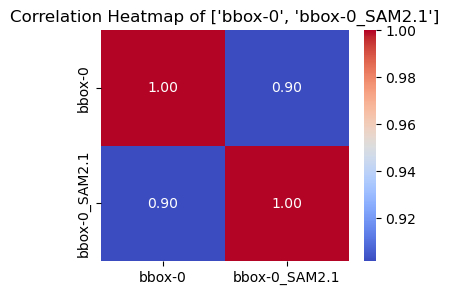

In [54]:
analyze_columns(df_sam, ['bbox-0', 'bbox-0_SAM2.1'])


Analyzing columns: ['bbox-1', 'bbox-1_SAM2.1']

Descriptive Statistics:
             bbox-1  bbox-1_SAM2.1
count  4186.000000    4186.000000
mean   1680.197086    1679.545389
std     616.086225     615.989679
min     151.000000     151.000000
25%    1185.000000    1184.250000
50%    1664.500000    1663.000000
75%    2172.000000    2169.000000
max    3579.000000    3577.000000

Skewness:
 bbox-1           0.077811
bbox-1_SAM2.1    0.077726
dtype: float64

Kurtosis:
 bbox-1          -0.839996
bbox-1_SAM2.1   -0.839785
dtype: float64


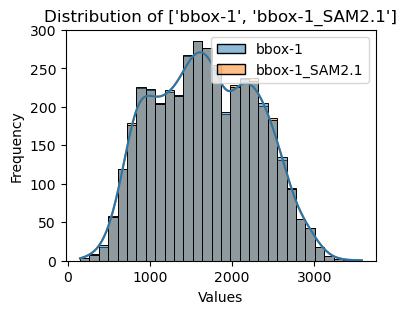


Shapiro-Wilk Test for 'bbox-1': ShapiroResult(statistic=0.9840336276067941, pvalue=2.35845500320087e-21)

Shapiro-Wilk Test for 'bbox-1_SAM2.1': ShapiroResult(statistic=0.9840495083917323, pvalue=2.417466174507729e-21)

Levene's Test for equality of variances: LeveneResult(statistic=0.00018208765936154314, pvalue=0.9892340052493347)

Paired t-test between 'bbox-1' and 'bbox-1_SAM2.1': TtestResult(statistic=0.14266322546280527, pvalue=0.8865630291441777, df=4185)
Wilcoxon Signed-Rank Test between 'bbox-1' and 'bbox-1_SAM2.1': WilcoxonResult(statistic=1331515.5, pvalue=1.4613703970587069e-114)
Pearson correlation between 'bbox-1' and 'bbox-1_SAM2.1': PearsonRResult(statistic=0.8849145409346721, pvalue=0.0)
Spearman correlation between 'bbox-1' and 'bbox-1_SAM2.1': SignificanceResult(statistic=0.8828115289839293, pvalue=0.0)

ANOVA result across ['bbox-1', 'bbox-1_SAM2.1']: F_onewayResult(statistic=0.002342311080529694, pvalue=0.9614006634311648)
Kruskal-Wallis Test across ['bbox-1', 'bb

<Figure size 200x100 with 0 Axes>

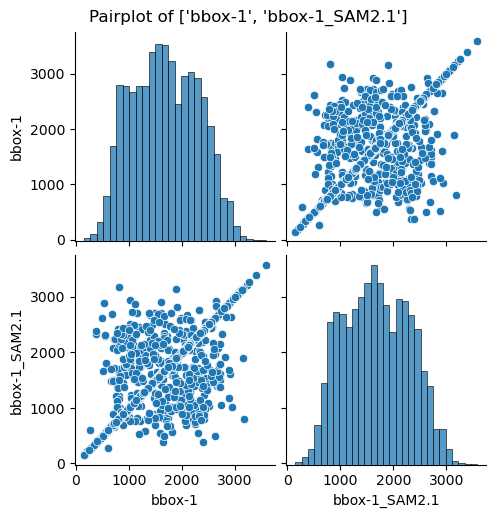

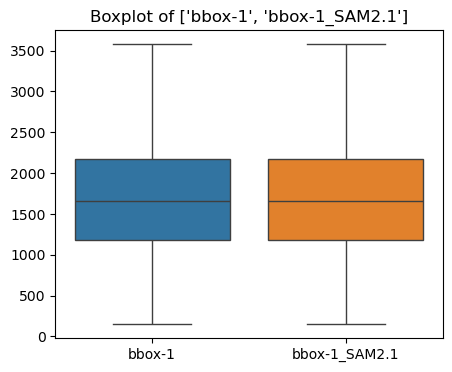

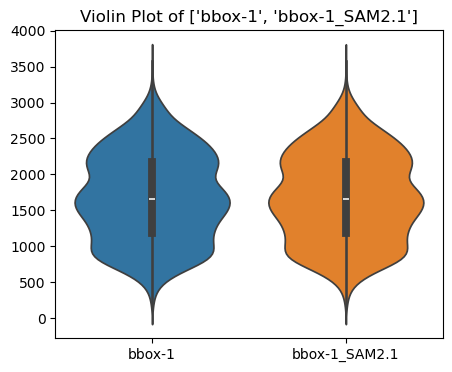

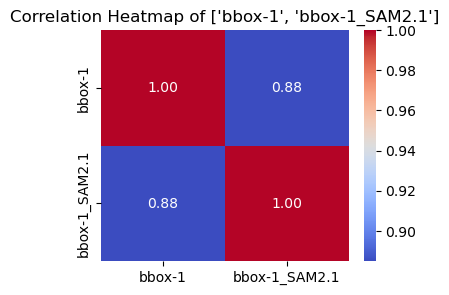

In [55]:
analyze_columns(df_sam, ['bbox-1', 'bbox-1_SAM2.1'])


Analyzing columns: ['bbox-2', 'bbox-2_SAM2.1']

Descriptive Statistics:
             bbox-2  bbox-2_SAM2.1
count  4186.000000    4186.000000
mean   3673.930721    3673.654324
std     574.156369     574.054621
min    2326.000000    2325.000000
25%    3206.000000    3205.000000
50%    3668.000000    3668.000000
75%    4135.000000    4133.750000
max    5127.000000    5126.000000

Skewness:
 bbox-2           0.022799
bbox-2_SAM2.1    0.023007
dtype: float64

Kurtosis:
 bbox-2          -0.968238
bbox-2_SAM2.1   -0.968721
dtype: float64


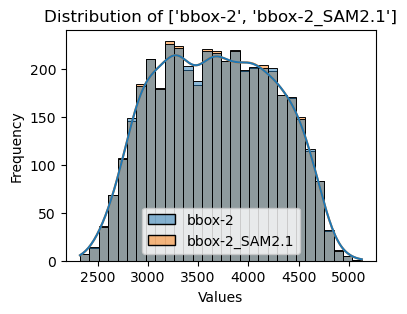


Shapiro-Wilk Test for 'bbox-2': ShapiroResult(statistic=0.9786684360148015, pvalue=1.3330772675403144e-24)

Shapiro-Wilk Test for 'bbox-2_SAM2.1': ShapiroResult(statistic=0.9786386633896496, pvalue=1.2841771813699947e-24)

Levene's Test for equality of variances: LeveneResult(statistic=0.00012497092986988497, pvalue=0.991080869002568)

Paired t-test between 'bbox-2' and 'bbox-2_SAM2.1': TtestResult(statistic=0.06994037187231418, pvalue=0.9442444612971479, df=4185)
Wilcoxon Signed-Rank Test between 'bbox-2' and 'bbox-2_SAM2.1': WilcoxonResult(statistic=1871686.5, pvalue=5.1101426160777286e-23)
Pearson correlation between 'bbox-2' and 'bbox-2_SAM2.1': PearsonRResult(statistic=0.9008259267184824, pvalue=0.0)
Spearman correlation between 'bbox-2' and 'bbox-2_SAM2.1': SignificanceResult(statistic=0.9004142129431921, pvalue=0.0)

ANOVA result across ['bbox-2', 'bbox-2_SAM2.1']: F_onewayResult(statistic=0.0004851254818953566, pvalue=0.9824280881587604)
Kruskal-Wallis Test across ['bbox-2', '

<Figure size 200x100 with 0 Axes>

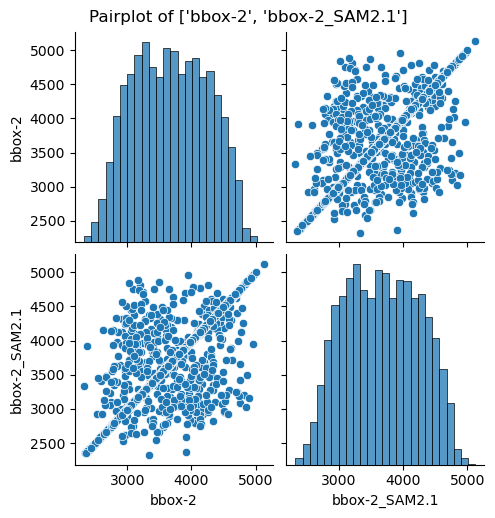

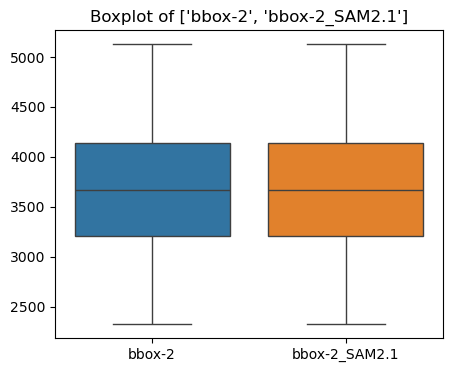

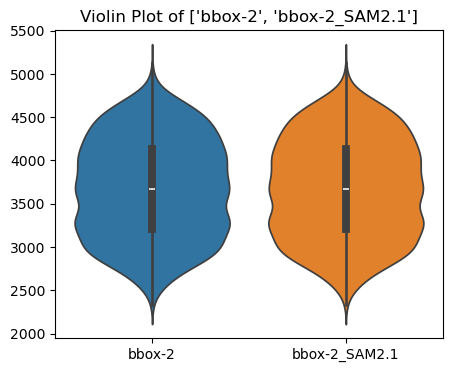

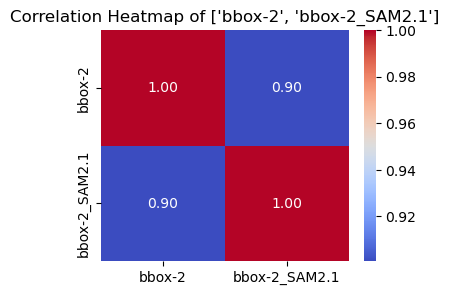

In [56]:
analyze_columns(df_sam, ['bbox-2', 'bbox-2_SAM2.1'])


Analyzing columns: ['bbox-3', 'bbox-3_SAM2.1']

Descriptive Statistics:
             bbox-3  bbox-3_SAM2.1
count  4186.000000    4186.000000
mean   2002.239130    2003.371476
std     620.921349     620.715126
min     478.000000     478.000000
25%    1501.000000    1502.250000
50%    1986.000000    1987.000000
75%    2487.750000    2489.750000
max    3910.000000    3911.000000

Skewness:
 bbox-3           0.109772
bbox-3_SAM2.1    0.109767
dtype: float64

Kurtosis:
 bbox-3          -0.818131
bbox-3_SAM2.1   -0.818083
dtype: float64


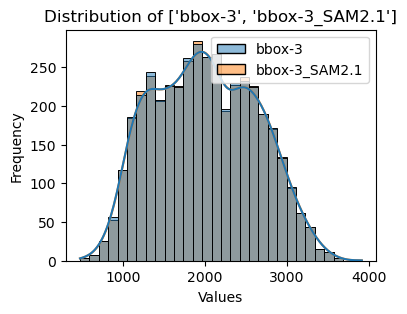


Shapiro-Wilk Test for 'bbox-3': ShapiroResult(statistic=0.9843908216893784, pvalue=4.1298698428532884e-21)

Shapiro-Wilk Test for 'bbox-3_SAM2.1': ShapiroResult(statistic=0.9843899116405054, pvalue=4.1239305804352785e-21)

Levene's Test for equality of variances: LeveneResult(statistic=0.0006666295571828076, pvalue=0.9794021867295402)

Paired t-test between 'bbox-3' and 'bbox-3_SAM2.1': TtestResult(statistic=-0.24865399696579332, pvalue=0.8036406373787597, df=4185)
Wilcoxon Signed-Rank Test between 'bbox-3' and 'bbox-3_SAM2.1': WilcoxonResult(statistic=1098610.0, pvalue=5.766043319673247e-219)
Pearson correlation between 'bbox-3' and 'bbox-3_SAM2.1': PearsonRResult(statistic=0.8873820958520328, pvalue=0.0)
Spearman correlation between 'bbox-3' and 'bbox-3_SAM2.1': SignificanceResult(statistic=0.8843889757504847, pvalue=0.0)

ANOVA result across ['bbox-3', 'bbox-3_SAM2.1']: F_onewayResult(statistic=0.006963034048525633, pvalue=0.9334998657908178)
Kruskal-Wallis Test across ['bbox-3', '

<Figure size 200x100 with 0 Axes>

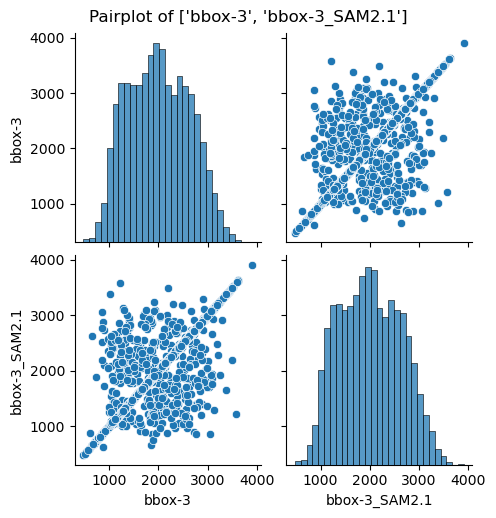

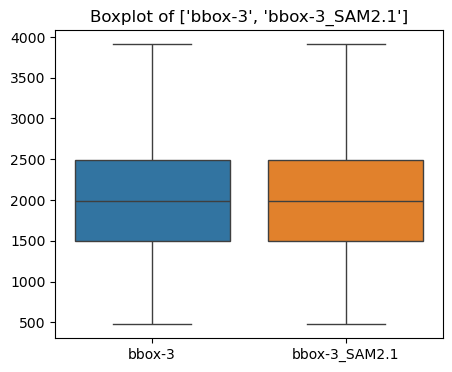

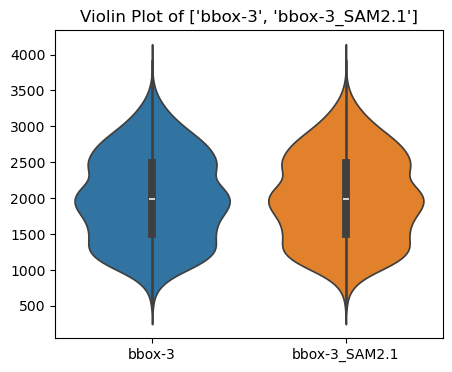

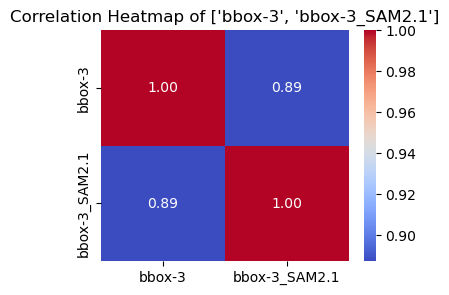

In [57]:
analyze_columns(df_sam, ['bbox-3', 'bbox-3_SAM2.1'])


Analyzing columns: ['Area_pix_SAM', 'Area_pix_SAM2.1']

Descriptive Statistics:
         Area_pix_SAM  Area_pix_SAM2.1
count    4186.000000      4186.000000
mean    79111.671046     79608.497133
std     40569.904343     40618.941219
min     14332.000000     14291.000000
25%     47391.750000     47865.750000
50%     71543.000000     72065.000000
75%    102280.750000    102748.500000
max    272297.000000    272935.000000

Skewness:
 Area_pix_SAM       0.942653
Area_pix_SAM2.1    0.942719
dtype: float64

Kurtosis:
 Area_pix_SAM       0.727841
Area_pix_SAM2.1    0.726714
dtype: float64


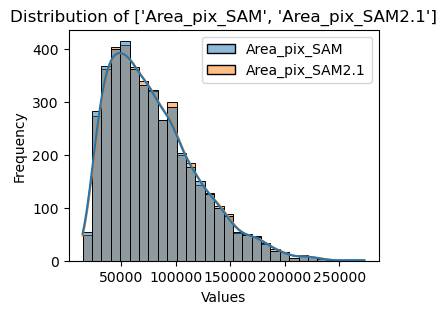


Shapiro-Wilk Test for 'Area_pix_SAM': ShapiroResult(statistic=0.9372214546259235, pvalue=7.192773210664772e-39)

Shapiro-Wilk Test for 'Area_pix_SAM2.1': ShapiroResult(statistic=0.937218952272237, pvalue=7.183007542054718e-39)

Levene's Test for equality of variances: LeveneResult(statistic=0.004617529825855105, pvalue=0.9458251422689985)

Paired t-test between 'Area_pix_SAM' and 'Area_pix_SAM2.1': TtestResult(statistic=-59.09290067123665, pvalue=0.0, df=4185)
Wilcoxon Signed-Rank Test between 'Area_pix_SAM' and 'Area_pix_SAM2.1': WilcoxonResult(statistic=568189.5, pvalue=0.0)
Pearson correlation between 'Area_pix_SAM' and 'Area_pix_SAM2.1': PearsonRResult(statistic=0.9999109505871011, pvalue=0.0)
Spearman correlation between 'Area_pix_SAM' and 'Area_pix_SAM2.1': SignificanceResult(statistic=0.9998972467766313, pvalue=0.0)

ANOVA result across ['Area_pix_SAM', 'Area_pix_SAM2.1']: F_onewayResult(statistic=0.3135054620162963, pvalue=0.5755520018669675)
Kruskal-Wallis Test across ['Area_

<Figure size 200x100 with 0 Axes>

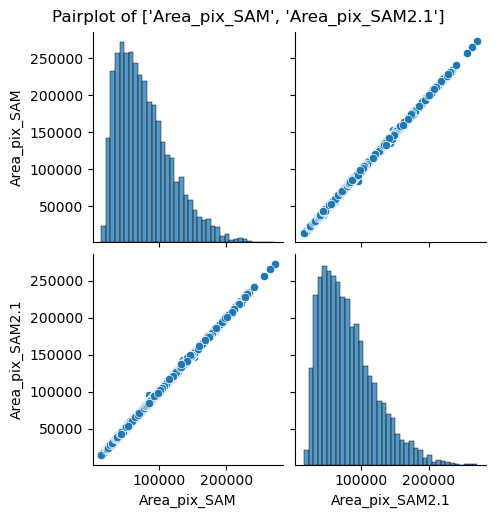

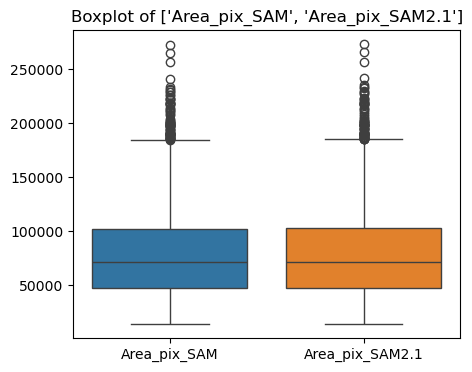

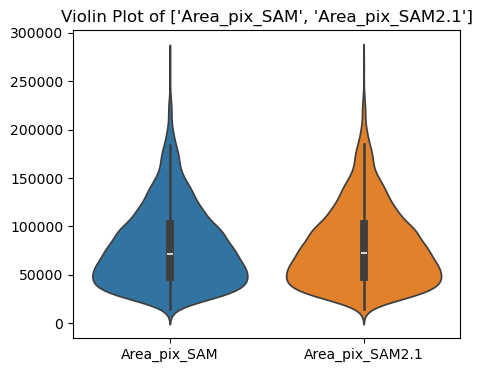

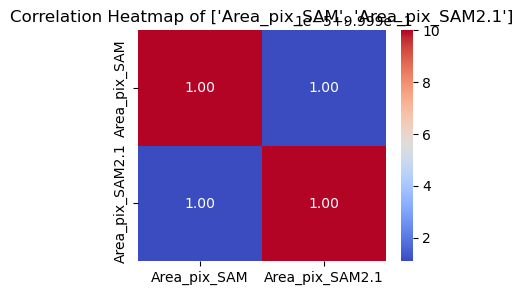

In [58]:
analyze_columns(df_sam, ['Area_pix_SAM', 'Area_pix_SAM2.1'])


Analyzing columns: ['Eccentricity', 'Eccentricity_SAM2.1']

Descriptive Statistics:
        Eccentricity  Eccentricity_SAM2.1
count   4186.000000          4186.000000
mean       0.671604             0.669913
std        0.076179             0.076805
min        0.207473             0.222974
25%        0.630038             0.627768
50%        0.682105             0.680607
75%        0.724569             0.723561
max        0.868670             0.867848

Skewness:
 Eccentricity          -0.860758
Eccentricity_SAM2.1   -0.869511
dtype: float64

Kurtosis:
 Eccentricity           1.361947
Eccentricity_SAM2.1    1.351325
dtype: float64


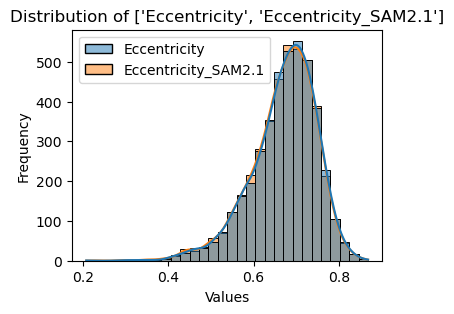


Shapiro-Wilk Test for 'Eccentricity': ShapiroResult(statistic=0.9628649670233991, pvalue=1.6761093408357987e-31)

Shapiro-Wilk Test for 'Eccentricity_SAM2.1': ShapiroResult(statistic=0.9620310026095049, pvalue=8.493163662406715e-32)

Levene's Test for equality of variances: LeveneResult(statistic=0.17175759781128125, pvalue=0.6785650961247714)

Paired t-test between 'Eccentricity' and 'Eccentricity_SAM2.1': TtestResult(statistic=3.9822712047487427, pvalue=6.94188737454509e-05, df=4185)
Wilcoxon Signed-Rank Test between 'Eccentricity' and 'Eccentricity_SAM2.1': WilcoxonResult(statistic=3161428.0, pvalue=6.711090246413326e-55)
Pearson correlation between 'Eccentricity' and 'Eccentricity_SAM2.1': PearsonRResult(statistic=0.9355431369227775, pvalue=0.0)
Spearman correlation between 'Eccentricity' and 'Eccentricity_SAM2.1': SignificanceResult(statistic=0.9389195939102132, pvalue=0.0)

ANOVA result across ['Eccentricity', 'Eccentricity_SAM2.1']: F_onewayResult(statistic=1.0226844764126437, 

<Figure size 200x100 with 0 Axes>

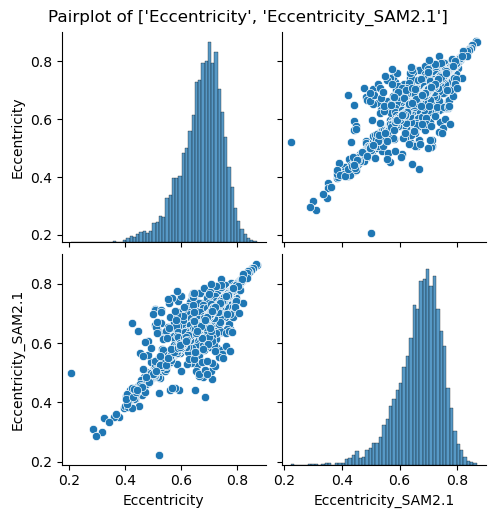

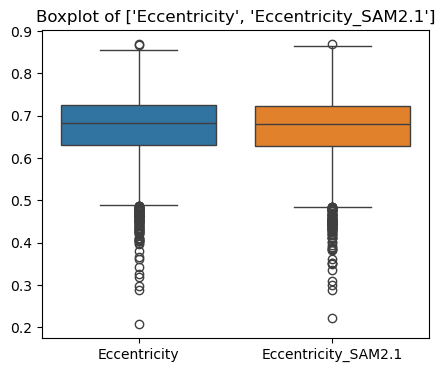

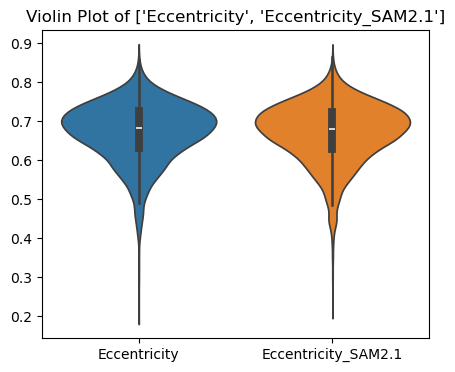

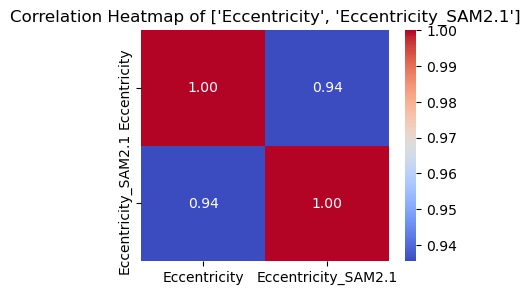

In [59]:
analyze_columns(df_sam, ['Eccentricity', 'Eccentricity_SAM2.1'])


Analyzing columns: ['equivalent_diameter_area', 'equivalent_diameter_area_SAM2.1']

Descriptive Statistics:
        equivalent_diameter_area  equivalent_diameter_area_SAM2.1
count               4186.000000                      4186.000000
mean                 307.337460                       308.411006
std                   79.204118                        79.024236
min                  135.085414                       134.892054
25%                  245.644154                       246.869531
50%                  301.813479                       302.912540
75%                  360.871022                       361.695249
max                  588.811777                       589.501175

Skewness:
 equivalent_diameter_area           0.384066
equivalent_diameter_area_SAM2.1    0.387263
dtype: float64

Kurtosis:
 equivalent_diameter_area          -0.383408
equivalent_diameter_area_SAM2.1   -0.380683
dtype: float64


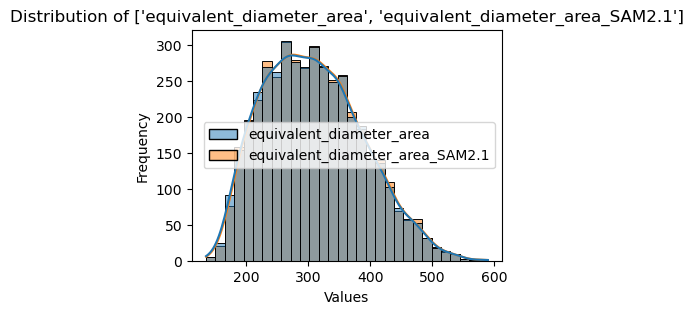


Shapiro-Wilk Test for 'equivalent_diameter_area': ShapiroResult(statistic=0.9828765769204509, pvalue=4.0813115168512547e-22)

Shapiro-Wilk Test for 'equivalent_diameter_area_SAM2.1': ShapiroResult(statistic=0.9827050651464513, pvalue=3.1703668353091074e-22)

Levene's Test for equality of variances: LeveneResult(statistic=0.02257408510525896, pvalue=0.8805735656742087)

Paired t-test between 'equivalent_diameter_area' and 'equivalent_diameter_area_SAM2.1': TtestResult(statistic=-61.63526139816757, pvalue=0.0, df=4185)
Wilcoxon Signed-Rank Test between 'equivalent_diameter_area' and 'equivalent_diameter_area_SAM2.1': WilcoxonResult(statistic=556096.0, pvalue=0.0)
Pearson correlation between 'equivalent_diameter_area' and 'equivalent_diameter_area_SAM2.1': PearsonRResult(statistic=0.9999011367567597, pvalue=0.0)
Spearman correlation between 'equivalent_diameter_area' and 'equivalent_diameter_area_SAM2.1': SignificanceResult(statistic=0.9998972467766313, pvalue=0.0)

ANOVA result across [

<Figure size 200x100 with 0 Axes>

In [ ]:
analyze_columns(df_sam, ['equivalent_diameter_area', 'equivalent_diameter_area_SAM2.1'])


Analyzing columns: ['perimeter', 'perimeter_SAM2.1']

Descriptive Statistics:
          perimeter  perimeter_SAM2.1
count  4186.000000       4186.000000
mean   1044.735569       1048.795351
std     272.843641        272.488493
min     449.972655        448.315801
25%     832.145274        836.163564
50%    1027.024999       1030.427020
75%    1225.981890       1229.706240
max    2011.013419       2010.327127

Skewness:
 perimeter           0.393122
perimeter_SAM2.1    0.395471
dtype: float64

Kurtosis:
 perimeter          -0.367567
perimeter_SAM2.1   -0.368940
dtype: float64


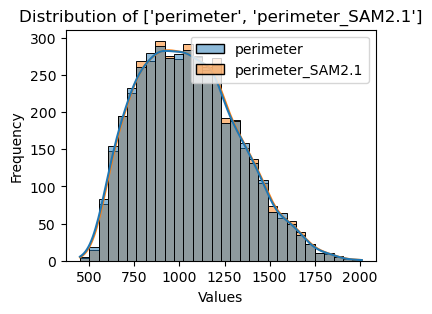


Shapiro-Wilk Test for 'perimeter': ShapiroResult(statistic=0.9823843240737915, pvalue=1.9865134442776418e-22)

Shapiro-Wilk Test for 'perimeter_SAM2.1': ShapiroResult(statistic=0.9821433424949646, pvalue=1.403968443417747e-22)

Levene's Test for equality of variances: LeveneResult(statistic=0.004669655575312797, pvalue=0.9455206925432252)

Paired t-test between 'perimeter' and 'perimeter_SAM2.1': TtestResult(statistic=-43.38575756559894, pvalue=0.0, df=4185)
Wilcoxon Signed-Rank Test between 'perimeter' and 'perimeter_SAM2.1': WilcoxonResult(statistic=934082.0, pvalue=0.0)
Pearson correlation between 'perimeter' and 'perimeter_SAM2.1': PearsonRResult(statistic=0.9997543475090124, pvalue=0.0)
Spearman correlation between 'perimeter' and 'perimeter_SAM2.1': SignificanceResult(statistic=0.9997585511806112, pvalue=0.0)

ANOVA result across ['perimeter', 'perimeter_SAM2.1']: F_onewayResult(statistic=0.4639938707731844, pvalue=0.4957821682263649)
Kruskal-Wallis Test across ['perimeter', 'pe

<Figure size 200x100 with 0 Axes>

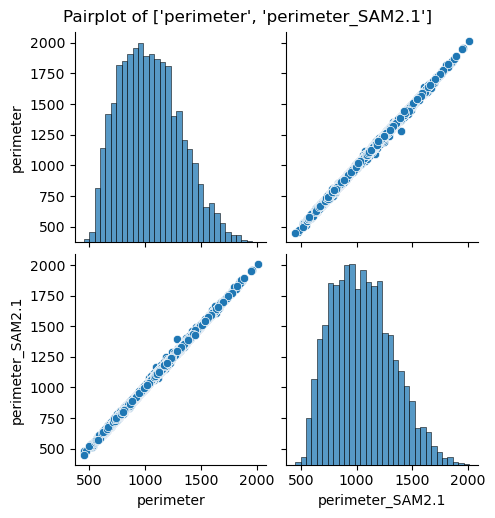

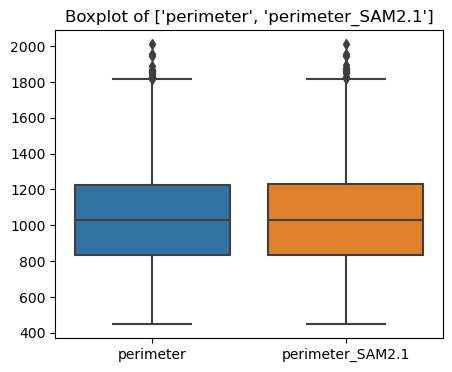

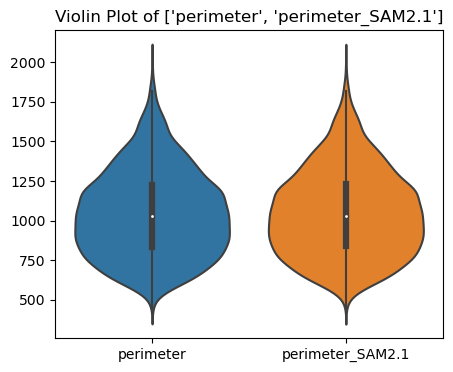

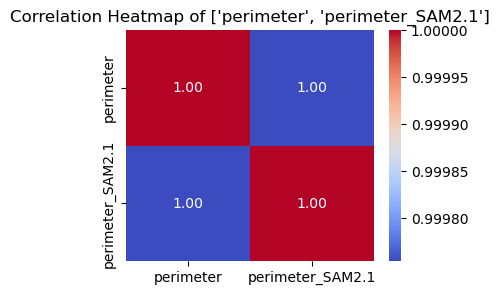

In [ ]:
analyze_columns(df_sam, ['perimeter', 'perimeter_SAM2.1'])


Analyzing columns: ['solidity', 'solidity_SAM2.1']

Descriptive Statistics:
           solidity  solidity_SAM2.1
count  4186.000000      4186.000000
mean      0.992599         0.992615
std       0.002389         0.002212
min       0.971720         0.971802
25%       0.991943         0.991942
50%       0.993163         0.993108
75%       0.994021         0.993939
max       0.996271         0.996290

Skewness:
 solidity          -2.806275
solidity_SAM2.1   -2.749630
dtype: float64

Kurtosis:
 solidity           12.813914
solidity_SAM2.1    12.860677
dtype: float64


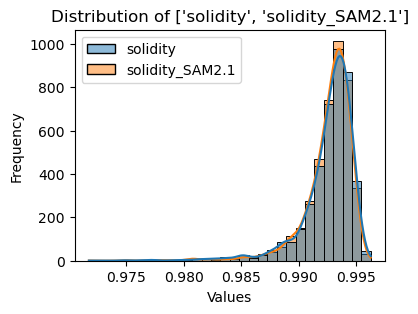


Shapiro-Wilk Test for 'solidity': ShapiroResult(statistic=0.7721849679946899, pvalue=0.0)

Shapiro-Wilk Test for 'solidity_SAM2.1': ShapiroResult(statistic=0.7874869108200073, pvalue=0.0)

Levene's Test for equality of variances: LeveneResult(statistic=4.438571855114634, pvalue=0.035165308061255916)

Paired t-test between 'solidity' and 'solidity_SAM2.1': TtestResult(statistic=-0.7747378414511131, pvalue=0.43853835402047636, df=4185)
Wilcoxon Signed-Rank Test between 'solidity' and 'solidity_SAM2.1': WilcoxonResult(statistic=4334498.0, pvalue=0.5461246346834641)
Pearson correlation between 'solidity' and 'solidity_SAM2.1': PearsonRResult(statistic=0.8231396145394626, pvalue=0.0)
Spearman correlation between 'solidity' and 'solidity_SAM2.1': SignificanceResult(statistic=0.7836250404906956, pvalue=0.0)

ANOVA result across ['solidity', 'solidity_SAM2.1']: F_onewayResult(statistic=0.10761443305194208, pvalue=0.7428847940192639)
Kruskal-Wallis Test across ['solidity', 'solidity_SAM2.1']: 

<Figure size 200x100 with 0 Axes>

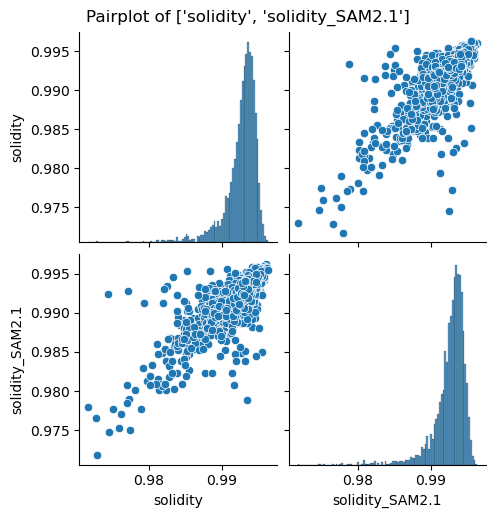

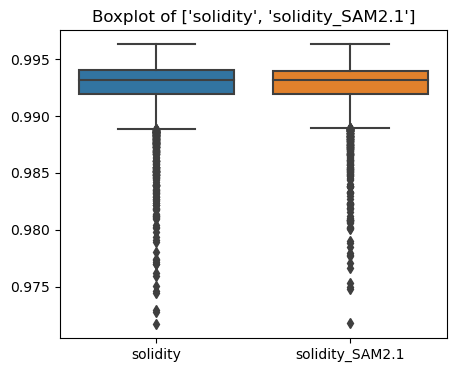

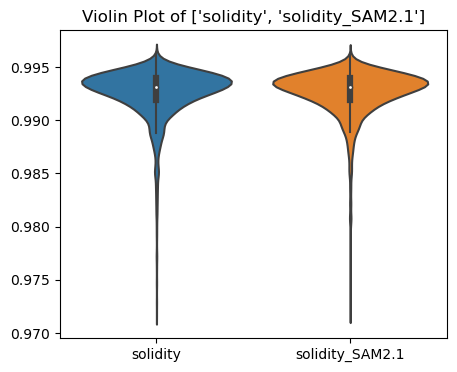

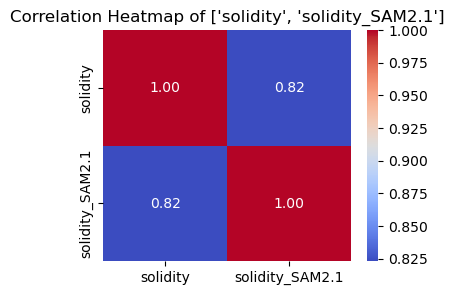

In [ ]:
analyze_columns(df_sam, ['solidity', 'solidity_SAM2.1'])


Analyzing columns: ['area_convex', 'area_convex_SAM2.1']

Descriptive Statistics:
          area_convex  area_convex_SAM2.1
count    4186.000000         4186.000000
mean    79684.267559        80181.146679
std     40856.622979        40898.338610
min     14477.000000        14439.000000
25%     47778.250000        48217.750000
50%     72039.000000        72562.500000
75%    103079.250000       103460.000000
max    274342.000000       274837.000000

Skewness:
 area_convex           0.947268
area_convex_SAM2.1    0.947036
dtype: float64

Kurtosis:
 area_convex           0.744471
area_convex_SAM2.1    0.742519
dtype: float64


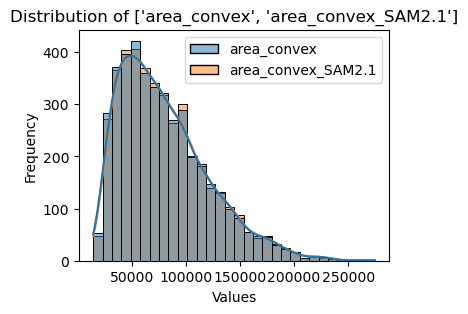


Shapiro-Wilk Test for 'area_convex': ShapiroResult(statistic=0.9368463158607483, pvalue=5.870218633260092e-39)

Shapiro-Wilk Test for 'area_convex_SAM2.1': ShapiroResult(statistic=0.9368708729743958, pvalue=5.948568032997421e-39)

Levene's Test for equality of variances: LeveneResult(statistic=0.003561922858304527, pvalue=0.9524104547992888)

Paired t-test between 'area_convex' and 'area_convex_SAM2.1': TtestResult(statistic=-60.12650783817632, pvalue=0.0, df=4185)
Wilcoxon Signed-Rank Test between 'area_convex' and 'area_convex_SAM2.1': WilcoxonResult(statistic=563328.0, pvalue=0.0)
Pearson correlation between 'area_convex' and 'area_convex_SAM2.1': PearsonRResult(statistic=0.9999149804417762, pvalue=0.0)
Spearman correlation between 'area_convex' and 'area_convex_SAM2.1': SignificanceResult(statistic=0.9998996453588593, pvalue=0.0)

ANOVA result across ['area_convex', 'area_convex_SAM2.1']: F_onewayResult(statistic=0.30924477080322366, pvalue=0.5781588593334462)
Kruskal-Wallis Test 

<Figure size 200x100 with 0 Axes>

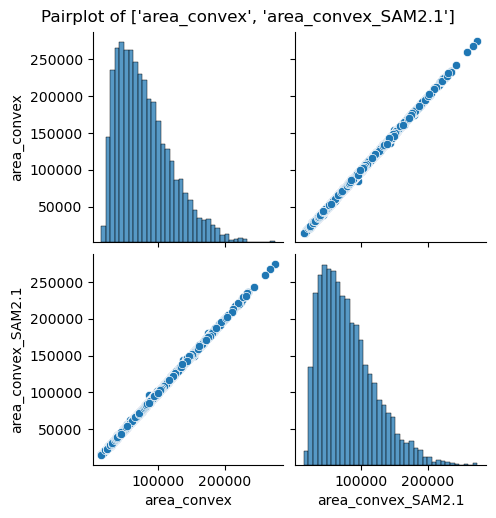

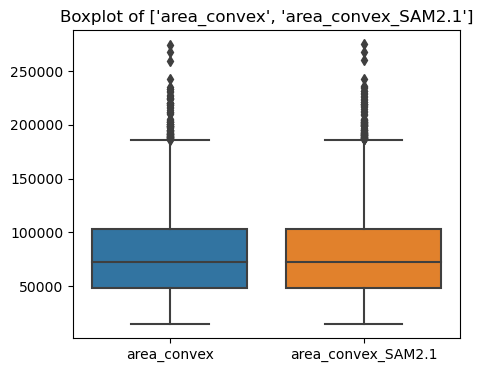

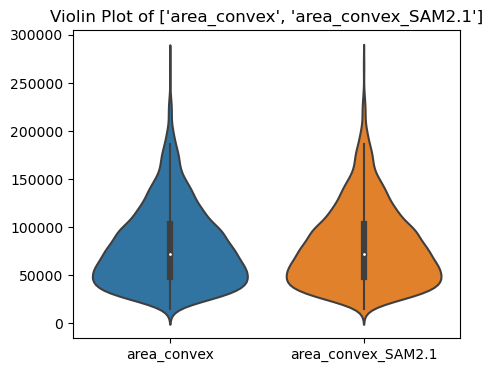

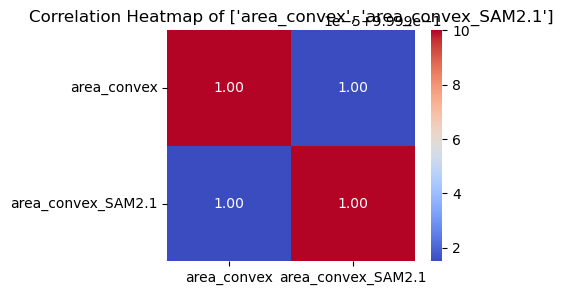

In [ ]:
analyze_columns(df_sam, ['area_convex', 'area_convex_SAM2.1'])


Analyzing columns: ['extent', 'extent_SAM2.1']

Descriptive Statistics:
             extent  extent_SAM2.1
count  4186.000000    4186.000000
mean      0.754972       0.755212
std       0.035460       0.034891
min       0.612037       0.616351
25%       0.729442       0.730504
50%       0.756063       0.756050
75%       0.781644       0.781809
max       0.891535       0.878706

Skewness:
 extent          -0.193563
extent_SAM2.1   -0.195742
dtype: float64

Kurtosis:
 extent          -0.229955
extent_SAM2.1   -0.258822
dtype: float64


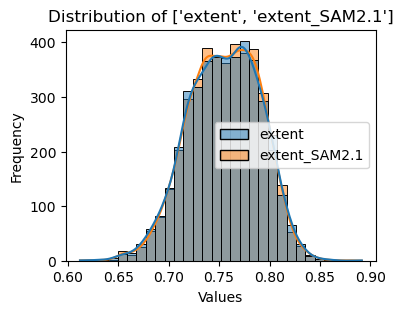


Shapiro-Wilk Test for 'extent': ShapiroResult(statistic=0.9950294494628906, pvalue=9.420026564344042e-11)

Shapiro-Wilk Test for 'extent_SAM2.1': ShapiroResult(statistic=0.9946256279945374, pvalue=2.443545019104043e-11)

Levene's Test for equality of variances: LeveneResult(statistic=0.833198050234354, pvalue=0.3613756971405002)

Paired t-test between 'extent' and 'extent_SAM2.1': TtestResult(statistic=-0.8861782838916382, pvalue=0.3755723813453272, df=4185)
Wilcoxon Signed-Rank Test between 'extent' and 'extent_SAM2.1': WilcoxonResult(statistic=4217711.0, pvalue=0.03598573150080922)
Pearson correlation between 'extent' and 'extent_SAM2.1': PearsonRResult(statistic=0.8751329584588485, pvalue=0.0)
Spearman correlation between 'extent' and 'extent_SAM2.1': SignificanceResult(statistic=0.882278059982953, pvalue=0.0)

ANOVA result across ['extent', 'extent_SAM2.1']: F_onewayResult(statistic=0.09814930309779293, pvalue=0.7540697546636013)
Kruskal-Wallis Test across ['extent', 'extent_SAM2.

<Figure size 200x100 with 0 Axes>

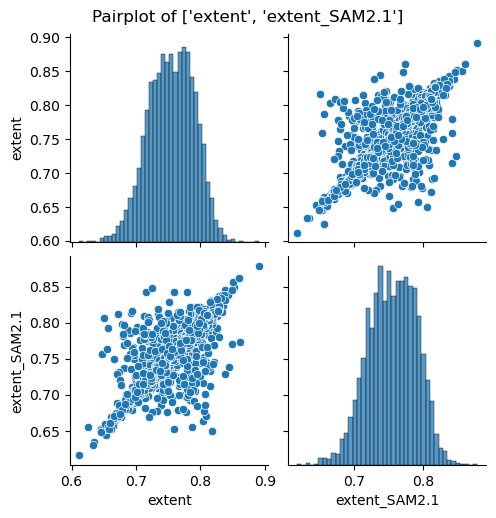

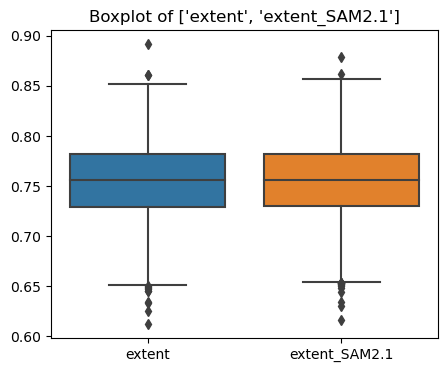

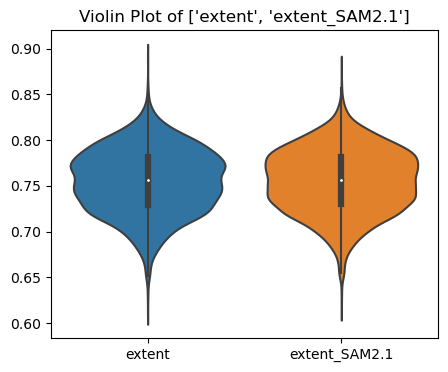

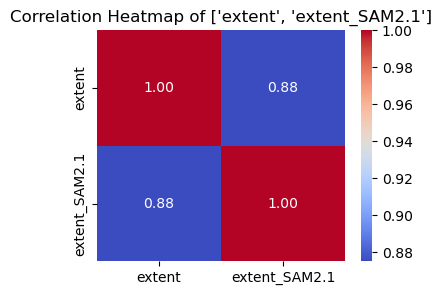

In [ ]:
analyze_columns(df_sam, ['extent', 'extent_SAM2.1'])


Analyzing columns: ['Axis Major Length(pix)_SAM', 'Axis Major Length(pix)_SAM2.1']

Descriptive Statistics:
        Axis Major Length(pix)_SAM  Axis Major Length(pix)_SAM2.1
count                 4186.000000                    4186.000000
mean                   361.631164                     362.538060
std                     98.356137                      98.263629
min                    149.838760                     148.659235
25%                    284.764729                     285.781726
50%                    354.730070                     356.204251
75%                    427.495844                     428.619516
max                    702.647421                     702.301268

Skewness:
 Axis Major Length(pix)_SAM       0.384850
Axis Major Length(pix)_SAM2.1    0.387991
dtype: float64

Kurtosis:
 Axis Major Length(pix)_SAM      -0.334369
Axis Major Length(pix)_SAM2.1   -0.333155
dtype: float64


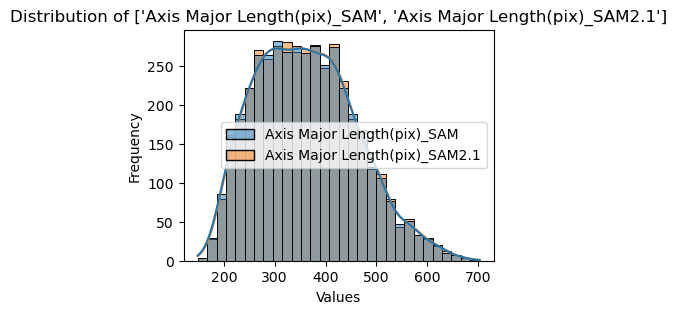


Shapiro-Wilk Test for 'Axis Major Length(pix)_SAM': ShapiroResult(statistic=0.9832285642623901, pvalue=6.893658803479969e-22)

Shapiro-Wilk Test for 'Axis Major Length(pix)_SAM2.1': ShapiroResult(statistic=0.9829942584037781, pvalue=4.85884094472962e-22)

Levene's Test for equality of variances: LeveneResult(statistic=0.0037899989365199733, pvalue=0.9509123387269864)

Paired t-test between 'Axis Major Length(pix)_SAM' and 'Axis Major Length(pix)_SAM2.1': TtestResult(statistic=-11.526671980327208, pvalue=2.7619236446738256e-30, df=4185)
Wilcoxon Signed-Rank Test between 'Axis Major Length(pix)_SAM' and 'Axis Major Length(pix)_SAM2.1': WilcoxonResult(statistic=2134462.0, pvalue=1.2656900281760385e-181)
Pearson correlation between 'Axis Major Length(pix)_SAM' and 'Axis Major Length(pix)_SAM2.1': PearsonRResult(statistic=0.9986598965644995, pvalue=0.0)
Spearman correlation between 'Axis Major Length(pix)_SAM' and 'Axis Major Length(pix)_SAM2.1': SignificanceResult(statistic=0.998621506267

<Figure size 200x100 with 0 Axes>

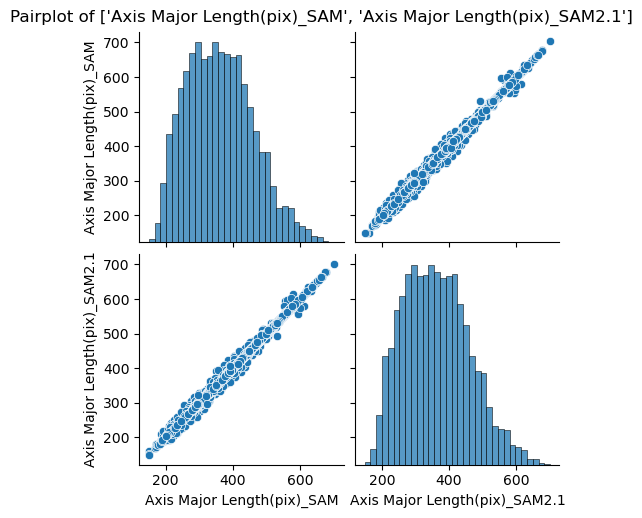

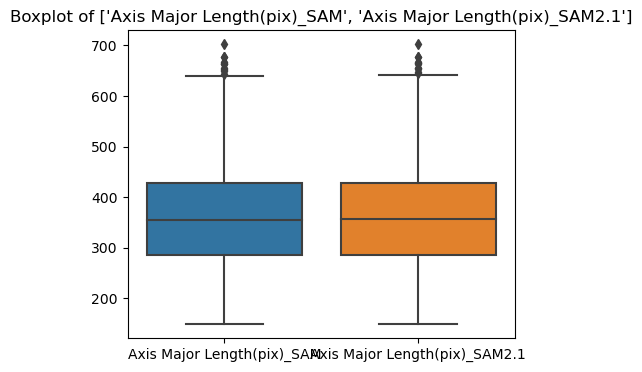

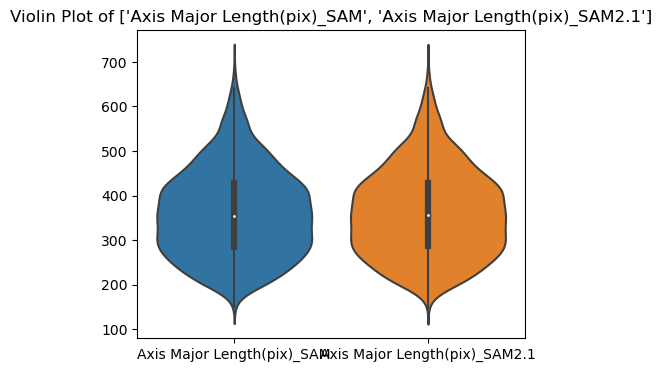

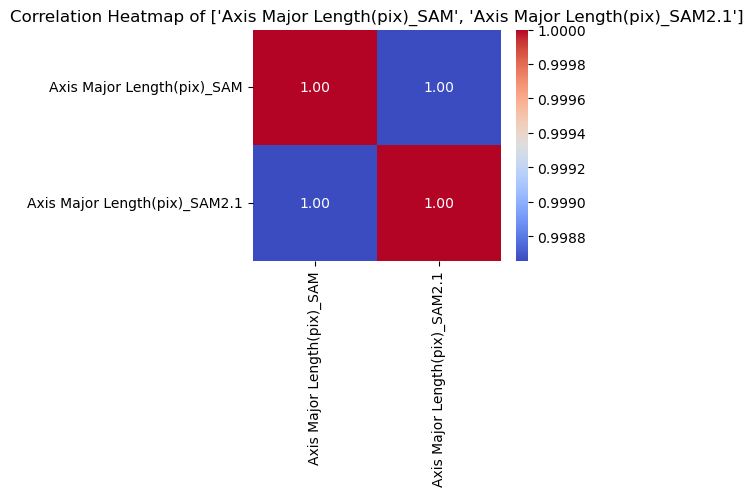

In [ ]:
analyze_columns(df_sam, ['Axis Major Length(pix)_SAM', 'Axis Major Length(pix)_SAM2.1'])


Analyzing columns: ['Axis Minor Length(pix)_SAM', 'Axis Minor Length(pix)_SAM2.1']

Descriptive Statistics:
        Axis Minor Length(pix)_SAM  Axis Minor Length(pix)_SAM2.1
count                 4186.000000                    4186.000000
mean                   262.711451                     263.837355
std                     65.836728                      65.611805
min                    121.556894                     122.631129
25%                    211.218974                     212.734253
50%                    256.675601                     257.903479
75%                    306.871878                     307.457338
max                    545.330761                     545.682978

Skewness:
 Axis Minor Length(pix)_SAM       0.453389
Axis Minor Length(pix)_SAM2.1    0.457429
dtype: float64

Kurtosis:
 Axis Minor Length(pix)_SAM      -0.213136
Axis Minor Length(pix)_SAM2.1   -0.206129
dtype: float64


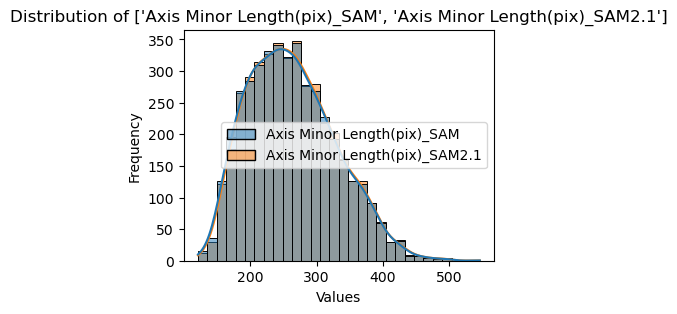


Shapiro-Wilk Test for 'Axis Minor Length(pix)_SAM': ShapiroResult(statistic=0.9812021851539612, pvalue=3.737894652632912e-23)

Shapiro-Wilk Test for 'Axis Minor Length(pix)_SAM2.1': ShapiroResult(statistic=0.9810066223144531, pvalue=2.856783406522269e-23)

Levene's Test for equality of variances: LeveneResult(statistic=0.05605630405429599, pvalue=0.8128471296418438)

Paired t-test between 'Axis Minor Length(pix)_SAM' and 'Axis Minor Length(pix)_SAM2.1': TtestResult(statistic=-19.971265634744174, pvalue=7.817266061783353e-85, df=4185)
Wilcoxon Signed-Rank Test between 'Axis Minor Length(pix)_SAM' and 'Axis Minor Length(pix)_SAM2.1': WilcoxonResult(statistic=1433815.0, pvalue=0.0)
Pearson correlation between 'Axis Minor Length(pix)_SAM' and 'Axis Minor Length(pix)_SAM2.1': PearsonRResult(statistic=0.9984658897189302, pvalue=0.0)
Spearman correlation between 'Axis Minor Length(pix)_SAM' and 'Axis Minor Length(pix)_SAM2.1': SignificanceResult(statistic=0.998319564099573, pvalue=0.0)

ANOV

<Figure size 200x100 with 0 Axes>

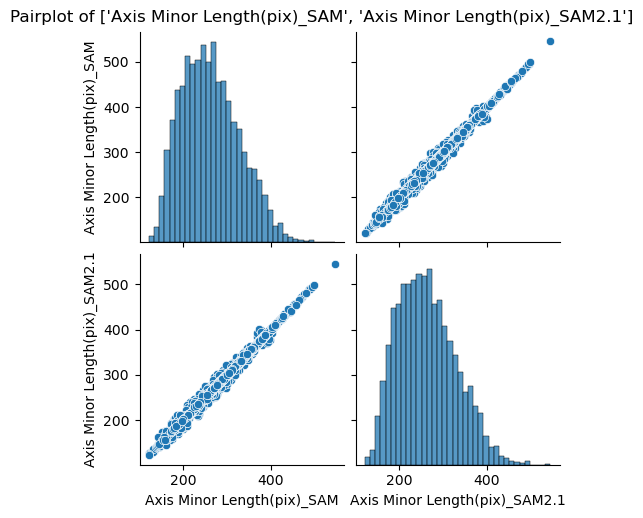

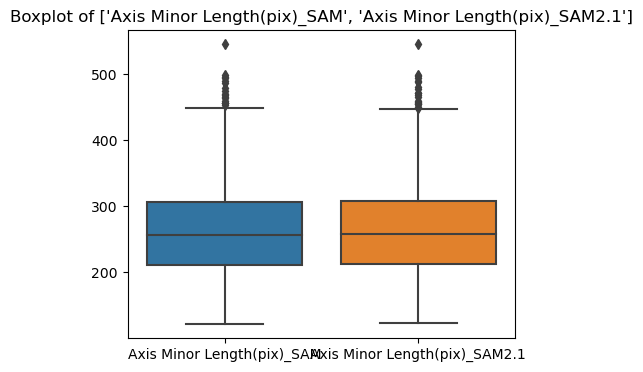

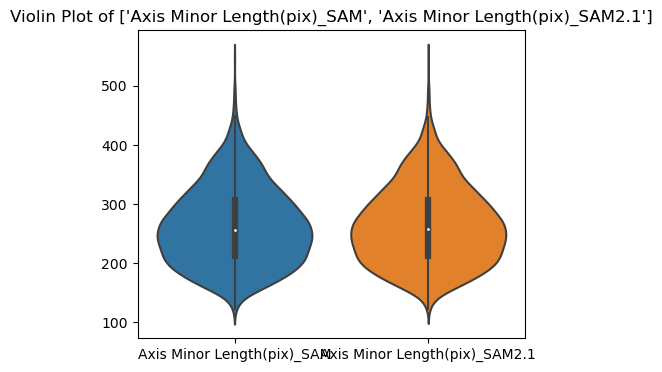

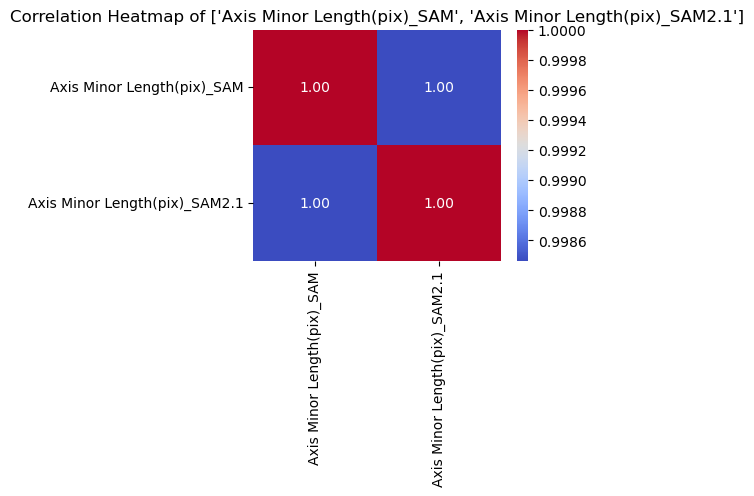

In [ ]:
analyze_columns(df_sam, [ 'Axis Minor Length(pix)_SAM',  'Axis Minor Length(pix)_SAM2.1'])


Analyzing columns: ['Aspect_Ratio', 'Aspect_Ratio_SAM2.1']

Descriptive Statistics:
        Aspect_Ratio  Aspect_Ratio_SAM2.1
count   4186.000000          4186.000000
mean       1.373497             1.370765
std        0.125020             0.124750
min        1.022243             1.025826
25%        1.287723             1.284685
50%        1.367514             1.364911
75%        1.450953             1.448728
max        2.018609             2.012760

Skewness:
 Aspect_Ratio           0.440468
Aspect_Ratio_SAM2.1    0.433649
dtype: float64

Kurtosis:
 Aspect_Ratio           0.674172
Aspect_Ratio_SAM2.1    0.658333
dtype: float64


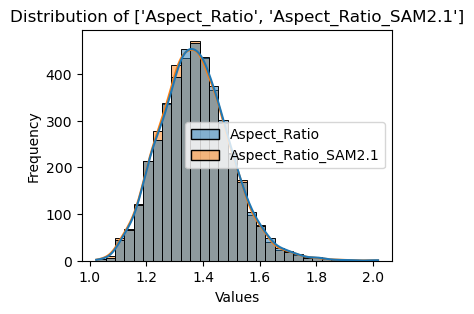


Shapiro-Wilk Test for 'Aspect_Ratio': ShapiroResult(statistic=0.9891576766967773, pvalue=2.1305515675238473e-17)

Shapiro-Wilk Test for 'Aspect_Ratio_SAM2.1': ShapiroResult(statistic=0.989447832107544, pvalue=3.884258176814256e-17)

Levene's Test for equality of variances: LeveneResult(statistic=0.005348693961757538, pvalue=0.9417006241947485)

Paired t-test between 'Aspect_Ratio' and 'Aspect_Ratio_SAM2.1': TtestResult(statistic=4.215239669393236, pvalue=2.547786850037822e-05, df=4185)
Wilcoxon Signed-Rank Test between 'Aspect_Ratio' and 'Aspect_Ratio_SAM2.1': WilcoxonResult(statistic=3137812.0, pvalue=5.648543705271913e-57)
Pearson correlation between 'Aspect_Ratio' and 'Aspect_Ratio_SAM2.1': PearsonRResult(statistic=0.943631878388059, pvalue=0.0)
Spearman correlation between 'Aspect_Ratio' and 'Aspect_Ratio_SAM2.1': SignificanceResult(statistic=0.9389195939102132, pvalue=0.0)

ANOVA result across ['Aspect_Ratio', 'Aspect_Ratio_SAM2.1']: F_onewayResult(statistic=1.0016016643974202, p

<Figure size 200x100 with 0 Axes>

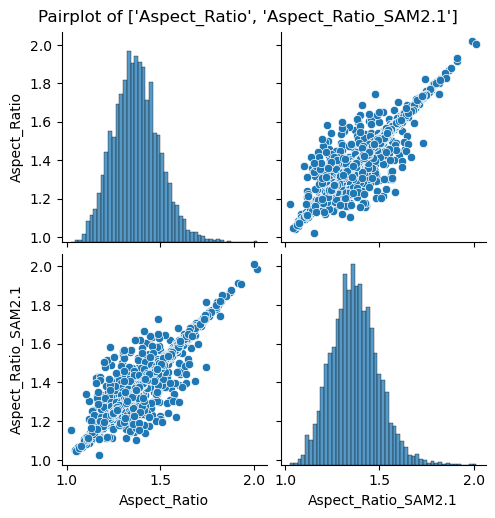

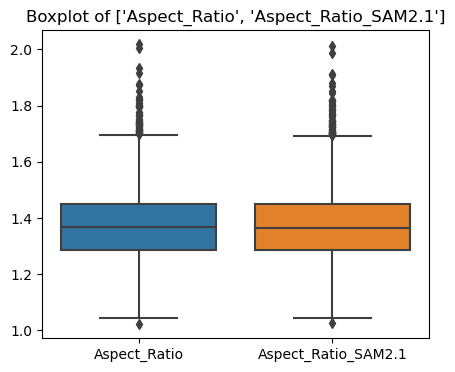

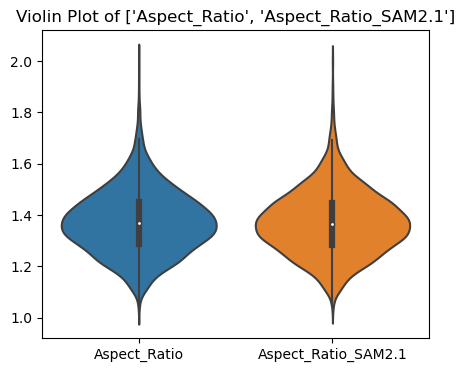

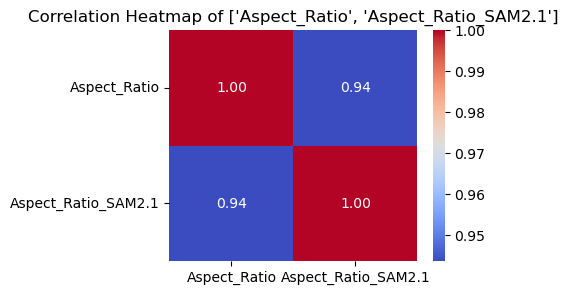

In [ ]:
analyze_columns(df_sam, ['Aspect_Ratio', 'Aspect_Ratio_SAM2.1'])


Analyzing columns: ['Roundness', 'Roundness_SAM2.1']

Descriptive Statistics:
          Roundness  Roundness_SAM2.1
count  4186.000000       4186.000000
mean      0.855450          0.854835
std       0.019540          0.019625
min       0.737049          0.714730
25%       0.844627          0.843911
50%       0.857766          0.857166
75%       0.868914          0.868352
max       0.901016          0.901702

Skewness:
 Roundness          -0.866079
Roundness_SAM2.1   -1.003969
dtype: float64

Kurtosis:
 Roundness           1.628823
Roundness_SAM2.1    2.392444
dtype: float64


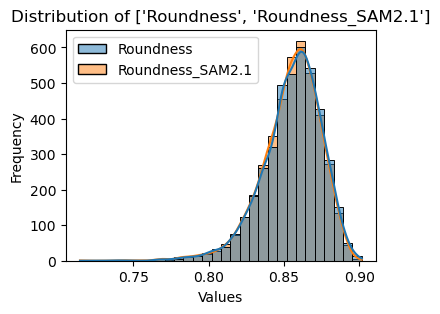


Shapiro-Wilk Test for 'Roundness': ShapiroResult(statistic=0.9641919136047363, pvalue=5.0685383894744286e-31)

Shapiro-Wilk Test for 'Roundness_SAM2.1': ShapiroResult(statistic=0.9550582766532898, pvalue=4.3715950732634495e-34)

Levene's Test for equality of variances: LeveneResult(statistic=0.06597828699778546, pvalue=0.7972913191697466)

Paired t-test between 'Roundness' and 'Roundness_SAM2.1': TtestResult(statistic=4.606880729595825, pvalue=4.209092119978991e-06, df=4185)
Wilcoxon Signed-Rank Test between 'Roundness' and 'Roundness_SAM2.1': WilcoxonResult(statistic=3918633.0, pvalue=3.1844046908493295e-09)
Pearson correlation between 'Roundness' and 'Roundness_SAM2.1': PearsonRResult(statistic=0.9029939919602523, pvalue=0.0)
Spearman correlation between 'Roundness' and 'Roundness_SAM2.1': SignificanceResult(statistic=0.9025384904307542, pvalue=0.0)

ANOVA result across ['Roundness', 'Roundness_SAM2.1']: F_onewayResult(statistic=2.058971282158762, pvalue=0.15134965461829963)
Kruskal

<Figure size 200x100 with 0 Axes>

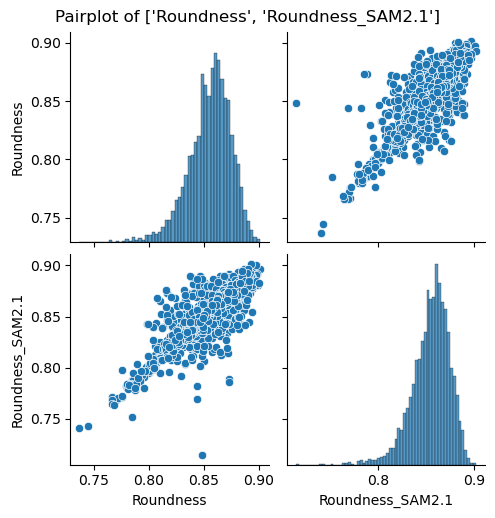

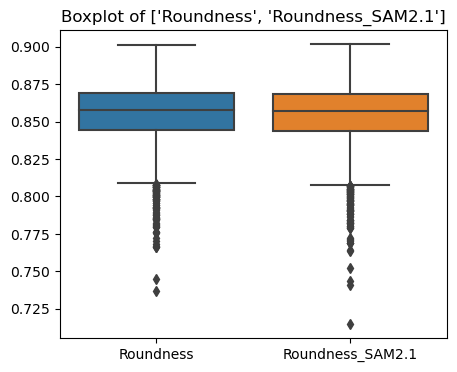

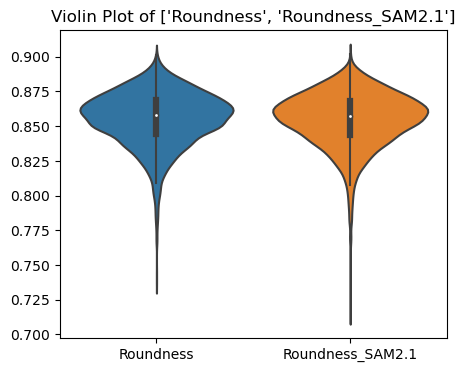

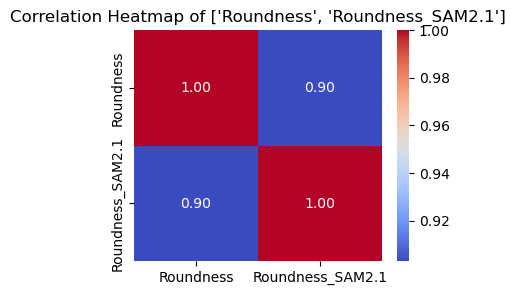

In [ ]:
analyze_columns(df_sam, ['Roundness', 'Roundness_SAM2.1'])


Analyzing columns: ['Compactness', 'Compactness_SAM2.1']

Descriptive Statistics:
        Compactness  Compactness_SAM2.1
count  4186.000000         4186.000000
mean      0.854208            0.855154
std       0.038326            0.038398
min       0.700036            0.700259
25%       0.828812            0.829518
50%       0.853820            0.854583
75%       0.879490            0.880727
max       0.985869            0.984079

Skewness:
 Compactness          -0.018983
Compactness_SAM2.1   -0.010788
dtype: float64

Kurtosis:
 Compactness           0.114686
Compactness_SAM2.1    0.111546
dtype: float64


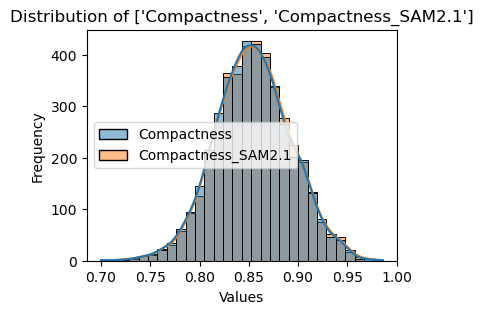


Shapiro-Wilk Test for 'Compactness': ShapiroResult(statistic=0.998989462852478, pvalue=0.01341325044631958)

Shapiro-Wilk Test for 'Compactness_SAM2.1': ShapiroResult(statistic=0.9990385174751282, pvalue=0.018571676686406136)

Levene's Test for equality of variances: LeveneResult(statistic=0.022148710360599753, pvalue=0.8816957598688047)

Paired t-test between 'Compactness' and 'Compactness_SAM2.1': TtestResult(statistic=-4.631938960634605, pvalue=3.732585558269768e-06, df=4185)
Wilcoxon Signed-Rank Test between 'Compactness' and 'Compactness_SAM2.1': WilcoxonResult(statistic=3032023.0, pvalue=9.400797186192435e-67)
Pearson correlation between 'Compactness' and 'Compactness_SAM2.1': PearsonRResult(statistic=0.9405969073939642, pvalue=0.0)
Spearman correlation between 'Compactness' and 'Compactness_SAM2.1': SignificanceResult(statistic=0.938501851001738, pvalue=0.0)

ANOVA result across ['Compactness', 'Compactness_SAM2.1']: F_onewayResult(statistic=1.2745199779495038, pvalue=0.2589527

<Figure size 200x100 with 0 Axes>

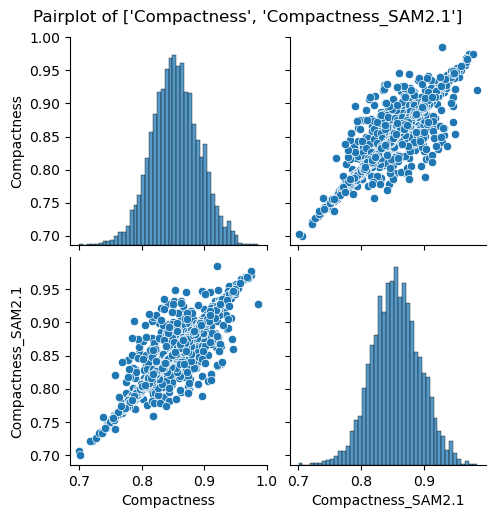

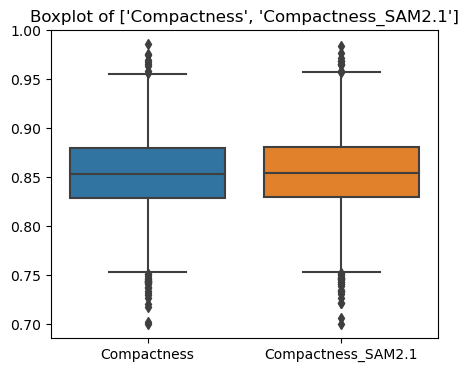

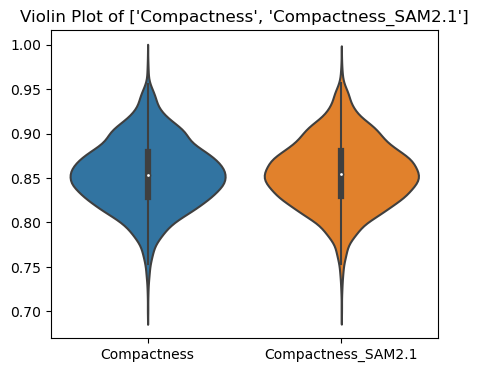

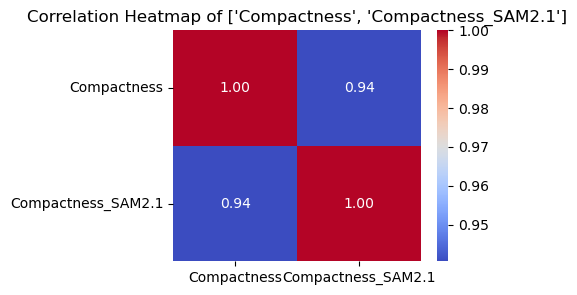

In [ ]:
analyze_columns(df_sam, ['Compactness', 'Compactness_SAM2.1'])


Analyzing columns: ['Circularity_SAM', 'Circularity_SAM2.1']

Descriptive Statistics:
        Circularity_SAM  Circularity_SAM2.1
count      4186.000000         4186.000000
mean          1.169599            1.170448
std           0.027321            0.027585
min           1.109858            1.109014
25%           1.150861            1.151607
50%           1.165819            1.166635
75%           1.183955            1.184959
max           1.356762            1.399130

Skewness:
 Circularity_SAM       1.080632
Circularity_SAM2.1    1.265992
dtype: float64

Kurtosis:
 Circularity_SAM       2.521706
Circularity_SAM2.1    3.809748
dtype: float64


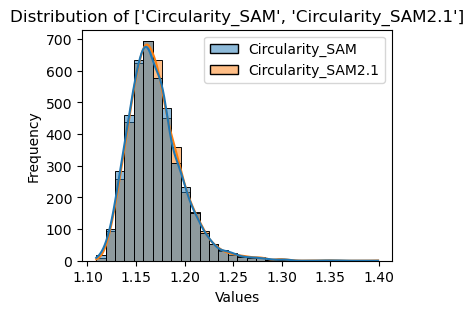


Shapiro-Wilk Test for 'Circularity_SAM': ShapiroResult(statistic=0.9481189846992493, pvalue=4.225242482309895e-36)

Shapiro-Wilk Test for 'Circularity_SAM2.1': ShapiroResult(statistic=0.9354227781295776, pvalue=2.7387874017781393e-39)

Levene's Test for equality of variances: LeveneResult(statistic=0.017265033771158424, pvalue=0.8954648346763218)

Paired t-test between 'Circularity_SAM' and 'Circularity_SAM2.1': TtestResult(statistic=-4.52125699027339, pvalue=6.317325442643379e-06, df=4185)
Wilcoxon Signed-Rank Test between 'Circularity_SAM' and 'Circularity_SAM2.1': WilcoxonResult(statistic=3921414.0, pvalue=3.950954836240694e-09)
Pearson correlation between 'Circularity_SAM' and 'Circularity_SAM2.1': PearsonRResult(statistic=0.9021231312075799, pvalue=0.0)
Spearman correlation between 'Circularity_SAM' and 'Circularity_SAM2.1': SignificanceResult(statistic=0.9025384904307542, pvalue=0.0)

ANOVA result across ['Circularity_SAM', 'Circularity_SAM2.1']: F_onewayResult(statistic=2.00163

<Figure size 200x100 with 0 Axes>

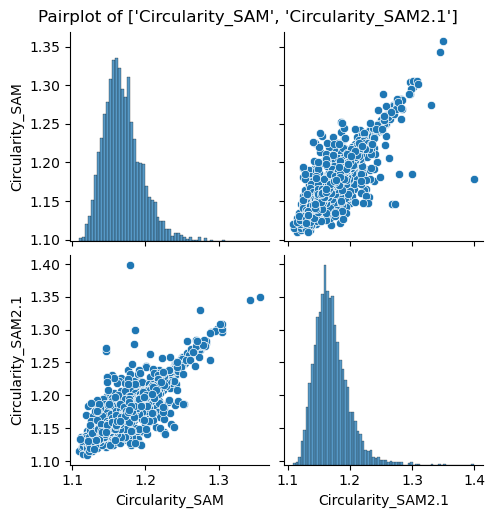

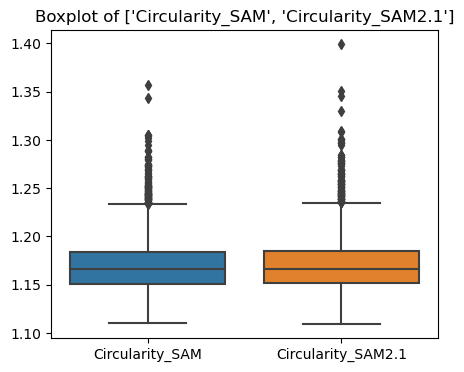

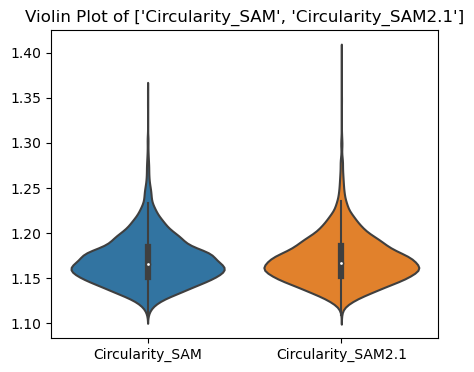

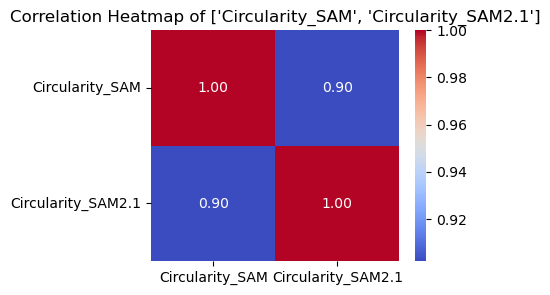

In [ ]:
analyze_columns(df_sam, ['Circularity_SAM', 'Circularity_SAM2.1'])


Analyzing columns: ['Shapefactor1', 'Shapefactor1_SAM2.1']

Descriptive Statistics:
        Shapefactor1  Shapefactor1_SAM2.1
count   4186.000000          4186.000000
mean       0.005185             0.005156
std        0.001335             0.001314
min        0.002348             0.002346
25%        0.004164             0.004157
50%        0.004976             0.004953
75%        0.006045             0.006004
max        0.010651             0.010402

Skewness:
 Shapefactor1           0.669451
Shapefactor1_SAM2.1    0.654818
dtype: float64

Kurtosis:
 Shapefactor1           0.115749
Shapefactor1_SAM2.1    0.086052
dtype: float64


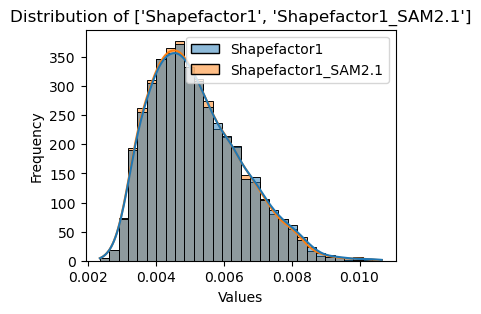


Shapiro-Wilk Test for 'Shapefactor1': ShapiroResult(statistic=0.9660179018974304, pvalue=2.450987912029479e-30)

Shapiro-Wilk Test for 'Shapefactor1_SAM2.1': ShapiroResult(statistic=0.9671924114227295, pvalue=6.995055046602047e-30)

Levene's Test for equality of variances: LeveneResult(statistic=0.7665190309214107, pvalue=0.3813212000193874)

Paired t-test between 'Shapefactor1' and 'Shapefactor1_SAM2.1': TtestResult(statistic=18.442320124508214, pvalue=4.4028572841311396e-73, df=4185)
Wilcoxon Signed-Rank Test between 'Shapefactor1' and 'Shapefactor1_SAM2.1': WilcoxonResult(statistic=1421586.0, pvalue=0.0)
Pearson correlation between 'Shapefactor1' and 'Shapefactor1_SAM2.1': PearsonRResult(statistic=0.9971669850464625, pvalue=0.0)
Spearman correlation between 'Shapefactor1' and 'Shapefactor1_SAM2.1': SignificanceResult(statistic=0.9983270486411344, pvalue=0.0)

ANOVA result across ['Shapefactor1', 'Shapefactor1_SAM2.1']: F_onewayResult(statistic=1.0071168717807408, pvalue=0.315623550

<Figure size 200x100 with 0 Axes>

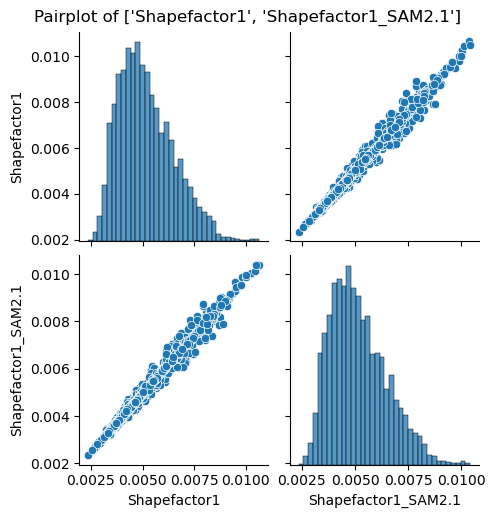

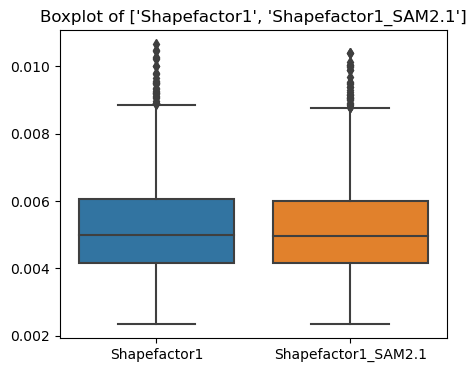

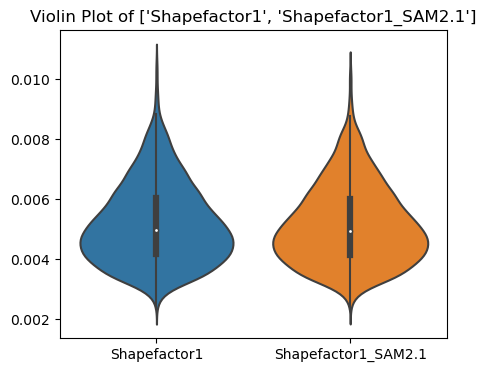

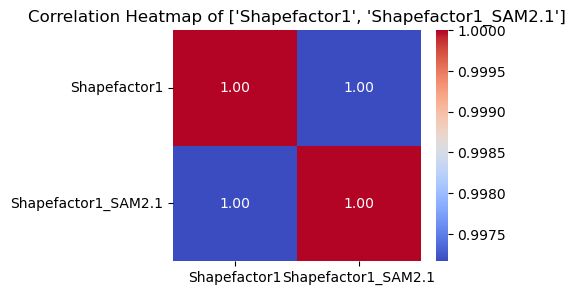

In [ ]:
analyze_columns(df_sam, ['Shapefactor1', 'Shapefactor1_SAM2.1'])


Analyzing columns: ['Shapefactor2', 'Shapefactor2_SAM2.1']

Descriptive Statistics:
        Shapefactor2  Shapefactor2_SAM2.1
count   4186.000000          4186.000000
mean       0.003818             0.003805
std        0.001099             0.001089
min        0.001820             0.001821
25%        0.002987             0.002982
50%        0.003602             0.003590
75%        0.004487             0.004471
max        0.008534             0.008581

Skewness:
 Shapefactor2           0.802663
Shapefactor2_SAM2.1    0.788192
dtype: float64

Kurtosis:
 Shapefactor2           0.262207
Shapefactor2_SAM2.1    0.212395
dtype: float64


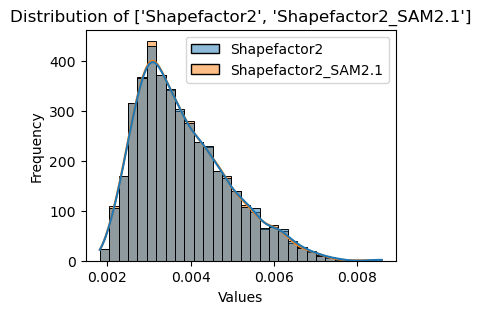


Shapiro-Wilk Test for 'Shapefactor2': ShapiroResult(statistic=0.9506298303604126, pvalue=2.131942389222609e-35)

Shapiro-Wilk Test for 'Shapefactor2_SAM2.1': ShapiroResult(statistic=0.9517306685447693, pvalue=4.424987771552225e-35)

Levene's Test for equality of variances: LeveneResult(statistic=0.20595299476286283, pvalue=0.6499698345290443)

Paired t-test between 'Shapefactor2' and 'Shapefactor2_SAM2.1': TtestResult(statistic=11.295415945659434, pvalue=3.6398210522602315e-29, df=4185)
Wilcoxon Signed-Rank Test between 'Shapefactor2' and 'Shapefactor2_SAM2.1': WilcoxonResult(statistic=2028850.0, pvalue=6.754268972661326e-199)
Pearson correlation between 'Shapefactor2' and 'Shapefactor2_SAM2.1': PearsonRResult(statistic=0.997711065187255, pvalue=0.0)
Spearman correlation between 'Shapefactor2' and 'Shapefactor2_SAM2.1': SignificanceResult(statistic=0.9986277629901068, pvalue=0.0)

ANOVA result across ['Shapefactor2', 'Shapefactor2_SAM2.1']: F_onewayResult(statistic=0.2977405027683631,

<Figure size 200x100 with 0 Axes>

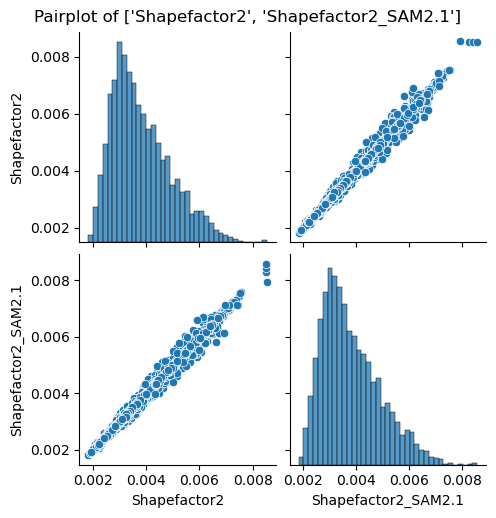

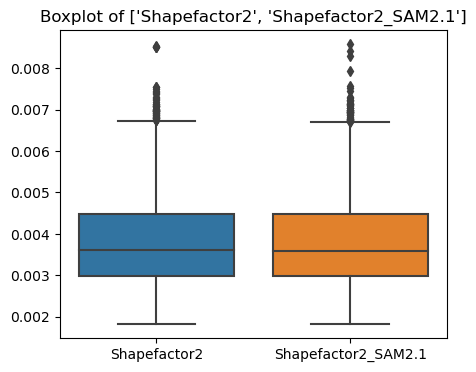

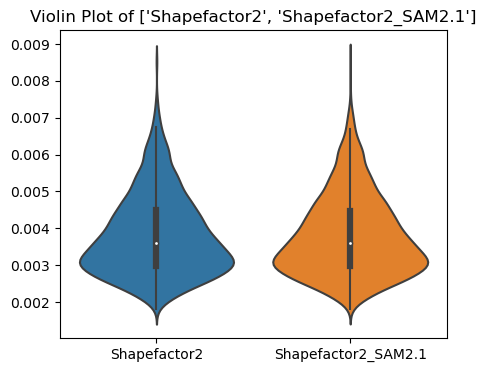

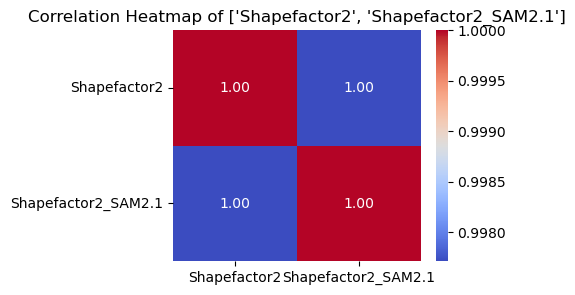

In [ ]:
analyze_columns(df_sam, ['Shapefactor2', 'Shapefactor2_SAM2.1'])


Analyzing columns: ['Shapefactor3', 'Shapefactor3_SAM2.1']

Descriptive Statistics:
        Shapefactor3  Shapefactor3_SAM2.1
count   4186.000000          4186.000000
mean       0.731510             0.733135
std        0.065517             0.065724
min        0.490299             0.490611
25%        0.687277             0.688449
50%        0.729379             0.730683
75%        0.773895             0.776074
max        0.972431             0.968903

Skewness:
 Shapefactor3           0.122146
Shapefactor3_SAM2.1    0.130265
dtype: float64

Kurtosis:
 Shapefactor3           0.075171
Shapefactor3_SAM2.1    0.076465
dtype: float64


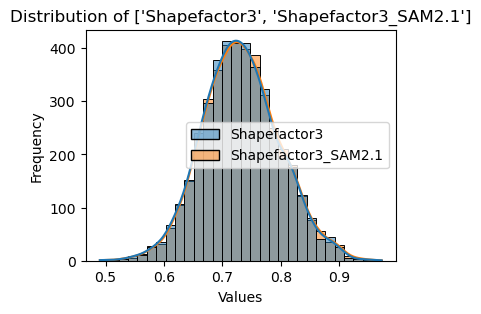


Shapiro-Wilk Test for 'Shapefactor3': ShapiroResult(statistic=0.9982470273971558, pvalue=0.00013052139547653496)

Shapiro-Wilk Test for 'Shapefactor3_SAM2.1': ShapiroResult(statistic=0.9981704354286194, pvalue=8.401551895076409e-05)

Levene's Test for equality of variances: LeveneResult(statistic=0.047286710201870114, pvalue=0.8278590137100519)

Paired t-test between 'Shapefactor3' and 'Shapefactor3_SAM2.1': TtestResult(statistic=-4.615523725579993, pvalue=4.0385023490192636e-06, df=4185)
Wilcoxon Signed-Rank Test between 'Shapefactor3' and 'Shapefactor3_SAM2.1': WilcoxonResult(statistic=3034005.0, pvalue=1.4576562939004232e-66)
Pearson correlation between 'Shapefactor3' and 'Shapefactor3_SAM2.1': PearsonRResult(statistic=0.939794530055114, pvalue=0.0)
Spearman correlation between 'Shapefactor3' and 'Shapefactor3_SAM2.1': SignificanceResult(statistic=0.938501851001738, pvalue=0.0)

ANOVA result across ['Shapefactor3', 'Shapefactor3_SAM2.1']: F_onewayResult(statistic=1.2826602953929005

<Figure size 200x100 with 0 Axes>

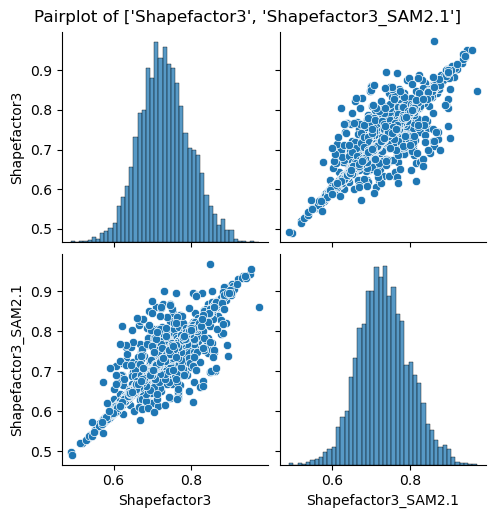

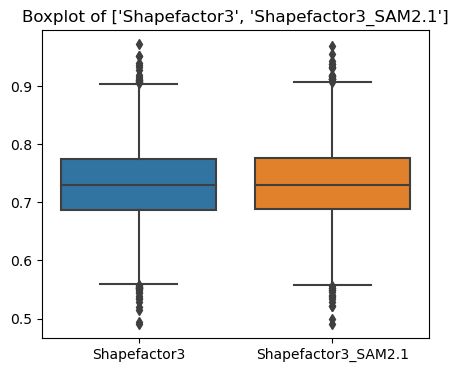

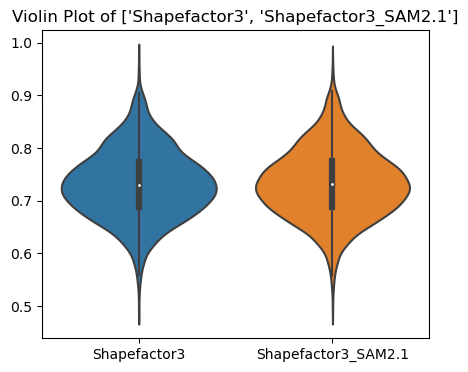

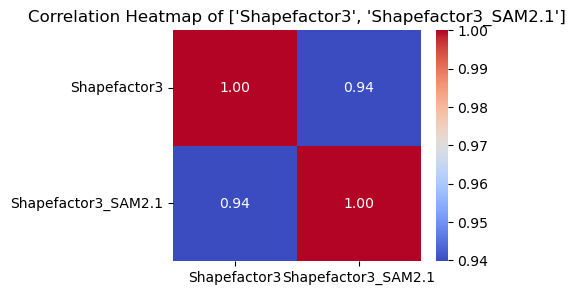

In [ ]:
analyze_columns(df_sam, ['Shapefactor3', 'Shapefactor3_SAM2.1'])


Analyzing columns: ['Shapefactor4', 'Shapefactor4_SAM2.1']

Descriptive Statistics:
        Shapefactor4  Shapefactor4_SAM2.1
count   4186.000000          4186.000000
mean       0.996608             0.996828
std        0.003205             0.003043
min        0.971808             0.974222
25%        0.995523             0.995793
50%        0.997496             0.997685
75%        0.998738             0.998836
max        1.000347             1.000398

Skewness:
 Shapefactor4          -2.216670
Shapefactor4_SAM2.1   -2.209112
dtype: float64

Kurtosis:
 Shapefactor4           7.164854
Shapefactor4_SAM2.1    7.089462
dtype: float64


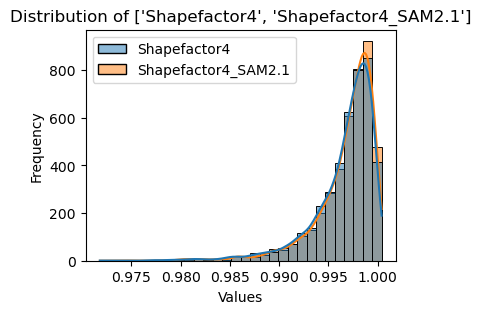


Shapiro-Wilk Test for 'Shapefactor4': ShapiroResult(statistic=0.8027178645133972, pvalue=0.0)

Shapiro-Wilk Test for 'Shapefactor4_SAM2.1': ShapiroResult(statistic=0.80406653881073, pvalue=0.0)

Levene's Test for equality of variances: LeveneResult(statistic=3.583654062111061, pvalue=0.05838513070269803)

Paired t-test between 'Shapefactor4' and 'Shapefactor4_SAM2.1': TtestResult(statistic=-9.457608542440854, pvalue=5.100637837768873e-21, df=4185)
Wilcoxon Signed-Rank Test between 'Shapefactor4' and 'Shapefactor4_SAM2.1': WilcoxonResult(statistic=2386823.0, pvalue=1.484694977718782e-143)
Pearson correlation between 'Shapefactor4' and 'Shapefactor4_SAM2.1': PearsonRResult(statistic=0.8849989023992831, pvalue=0.0)
Spearman correlation between 'Shapefactor4' and 'Shapefactor4_SAM2.1': SignificanceResult(statistic=0.8925060689782927, pvalue=0.0)

ANOVA result across ['Shapefactor4', 'Shapefactor4_SAM2.1']: F_onewayResult(statistic=10.391977609167297, pvalue=0.001270492829029707)
Kruskal-W

<Figure size 200x100 with 0 Axes>

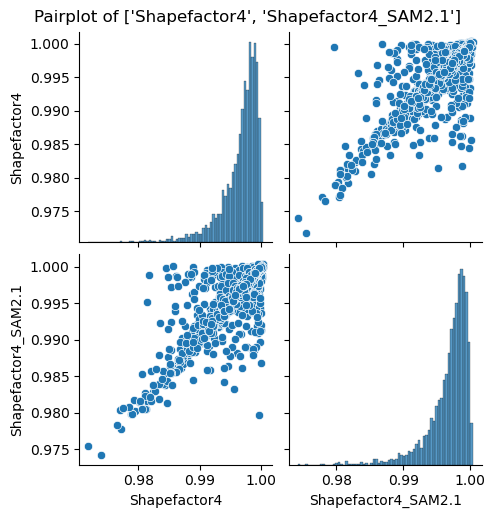

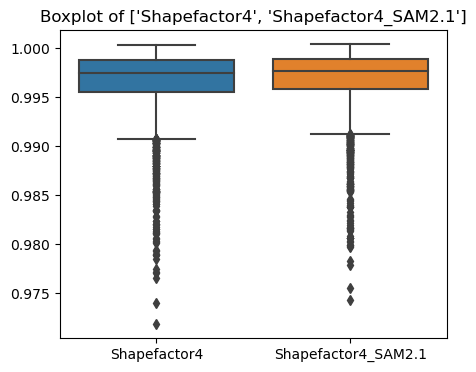

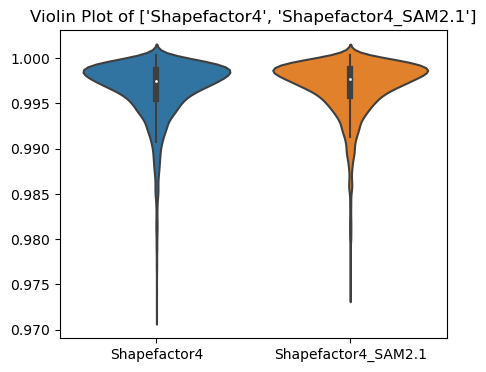

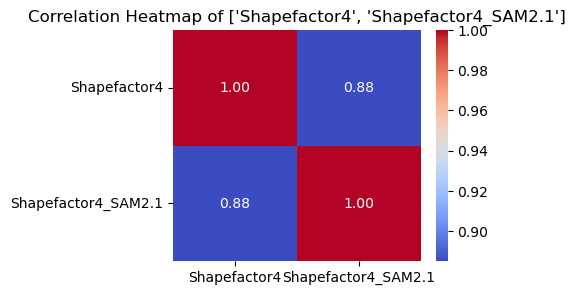

In [ ]:
analyze_columns(df_sam, ['Shapefactor4', 'Shapefactor4_SAM2.1'])

## Data from SAM1 and SAM2.1 is significantly and positively correlated with correlation stat of 0.8-1. 
